In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy.integrate import solve_ivp
import sympy as sp

In [2]:
A = np.array([
    [0, 0,         1,             0],
    [0, 0,         0,             1],
    [0, 0.060985, -7.4894,  -0.0875],
    [0, 1.08167, -0.82153, -1.55195]
])
B= np.array([
    [0],
    [0],
    [0.98343],
    [0.10787]
])

In [3]:
eigenvalues, eigenvectors = np.linalg.eig(A)

print("Собственные числа:", eigenvalues)
print("Собственные векторы:\n", eigenvectors)

Собственные числа: [ 0.          0.52103246 -2.05945329 -7.50292918]
Собственные векторы:
 [[ 1.          0.00327109 -0.00941855  0.13081038]
 [ 0.          0.88683569  0.4366943   0.01850665]
 [ 0.          0.00170434  0.01939707 -0.981461  ]
 [ 0.          0.46207018 -0.89935151 -0.13885408]]


In [4]:
A_transposed = A.T

print("Транспонированная матрица A:\n", A_transposed)

Транспонированная матрица A:
 [[ 0.        0.        0.        0.      ]
 [ 0.        0.        0.060985  1.08167 ]
 [ 1.        0.       -7.4894   -0.82153 ]
 [ 0.        1.       -0.0875   -1.55195 ]]


In [5]:
eigenvalues, eigenvectors = np.linalg.eig(A_transposed)

print("Собственные числа:", eigenvalues)
print("Собственные векторы:\n", eigenvectors)

Собственные числа: [ 0.52103246 -2.05945329 -7.50292918  0.        ]
Собственные векторы:
 [[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  9.91067090e-01]
 [ 8.99040872e-01 -4.57767272e-01 -1.05003266e-02  5.59178436e-08]
 [-4.46719983e-02 -1.32999572e-01  9.99809303e-01  1.33152788e-01]
 [ 4.35579985e-01  8.79067823e-01  1.64651291e-02 -7.50720899e-03]]


Система не является устойчивой. Хотим передвинуть собственные значения для достижения устойчивости

### 5 a

In [6]:
S_ = np.array([
    [0, 8.99040872e-01, -4.46719983e-02, 4.35579985e-01],
    [1,     0,      0,     0],
    [0,     0,      1,     0],
    [0,     0,      0,     1]
]) 
S = np.linalg.inv(S_)

print("S:\n", S) 

S:
 [[ 0.          1.          0.          0.        ]
 [ 1.11229648  0.          0.04968851 -0.48449409]
 [ 0.          0.          1.          0.        ]
 [ 0.          0.          0.          1.        ]]


In [7]:
A_1 = S_ @ A @ S
B_1 = S_ @ B
print("A^: ", A_1)
print("B^: ", B_1)

A^:  [[ 5.21032464e-01  0.00000000e+00  3.26277956e-10  1.38163606e-09]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00  0.00000000e+00]
 [ 6.78334010e-02  0.00000000e+00 -7.48636975e+00 -1.17046872e-01]
 [ 1.20313774e+00  0.00000000e+00 -7.67783433e-01 -2.07601272e+00]]
B^:  [[0.00305423]
 [0.        ]
 [0.98343   ]
 [0.10787   ]]


In [8]:
theta_1 = (-1 - 5.21032464e-01) / 0.00305423
print("theta^_1 = ", theta_1)

theta^_1 =  -498.0084879003874


In [9]:
theta_ = np.array([
    [theta_1, 0, 0, 0],
])
theta = theta_ @ S_
print("theta = ", theta)


theta =  [[   0.         -447.72998523   22.24703432 -216.92252969]]


In [10]:
Ac = A + B @ theta
print(Ac)

[[   0.            0.            1.            0.        ]
 [   0.            0.            0.            1.        ]
 [   0.         -440.25011437   14.38900097 -213.41562337]
 [   0.          -47.21496351    1.57825759  -24.95138328]]


In [11]:
eigenvalues, eigenvectors = np.linalg.eig(Ac)

print("Собственные числа:", eigenvalues)

Собственные числа: [ 0.         -7.50292914 -2.05945331 -0.99999987]


Для линейной системы


In [15]:
def model(x, t, A, B, theta):
    u = np.dot(theta, x)  # Управление по обратной связи
    dxdt = np.dot(A, x) + np.dot(B, u)
    return dxdt

t = np.linspace(0, 20, 1000)  # Временной интервал 0-8 секунд
x0 = [0, np.pi/8, 0, 0]         # Начальные условия [x1, x2, x3, x4]

solution = odeint(model, x0, t, args=(A, B, theta))
x1 = solution[:, 0]  # Позиция (x)
x2 = solution[:, 1]  # Угол (θ)
x3 = solution[:, 2]  # Скорость позиции (ẋ)
x4 = solution[:, 3]  # Угловая скорость (θ̇)

Для нелинейной системы

In [16]:
g = 9.81
Kt = 1.726
Ks = 4.487
Bcq = 5.4
m =  0.56
l =  0.1778
Bp = 1.4
I = 0.89
M = 1.206

A1 = m + M
C1 = m * l
D1 = I + m * l**2
K1 = Kt*Ks + Bcq

def system(x, Y):
    y1, y2, y3, y4 = Y

    #u = u1 * y1 + u2 * y2 + u3 * y3 + u4 * y4
    f1 = -K1*y3 - C1 * y4**2 * np.sin(y2)
    f2 = -Bp*y4 + C1 * g * np.sin(y2)

    dydt = [
        y3,
        y4,
        (m * y4 * np.cos(y2) - m * y4**2 * np.sin(y2)) / (m + M) + -440.25011437 * y2 + 14.38900097 * y3 + -213.41562337 * y4,
        (m * l * ((m * y4 * np.cos(y2) - m * y4**2 * np.sin(y2)) / (m + M) + -440.25011437 * y2 + 14.38900097 * y3 + -213.41562337 * y4) * np.cos(y2) + m * g * l * np.sin(y2)) / (I + m * l**2) + -47.21496351 * y2 + 1.57825759 * y3 + -24.95138328 * y4,
    ]

    return dydt


x0 = 0.0
xT = 20.0
y0 = [0.0, np.pi/8, 0.0, 0.0]
x_span = (x0, xT)  # интервал по x

# Временной интервал: от 0 до 8 секунд
t = np.linspace(0, 20, 1000)

# Интегрирование системы
sol = solve_ivp(system, x_span, y0, t_eval=np.linspace(x0, xT, 100))

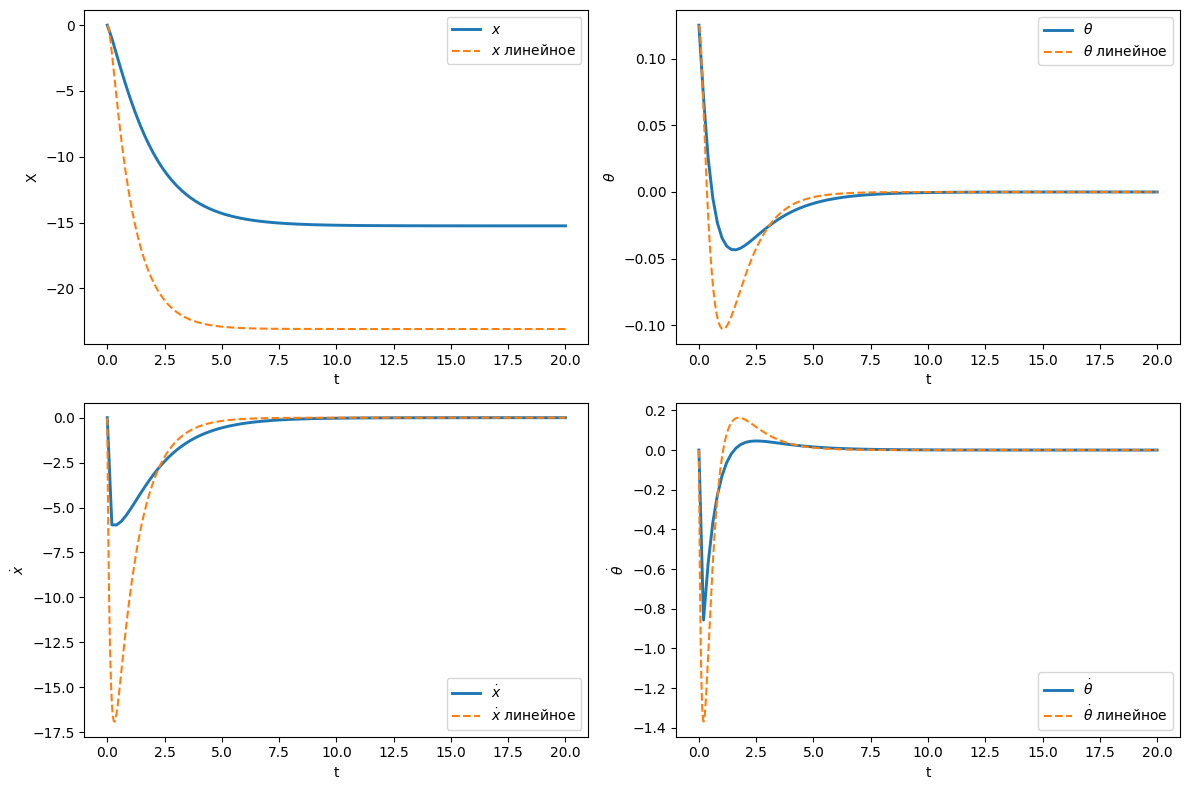

In [17]:
plt.figure(figsize=(12, 8))

# График x1 (позиция)
plt.subplot(2, 2, 1)
#plt.plot(t, x1, label='$x$', color='blue')
plt.plot(sol.t, sol.y[0], label='$x$', linewidth = 2.1)
plt.plot(t, x1, label='$x$ линейное', linestyle = '--')
plt.xlabel('t')
plt.ylabel('X')
plt.grid(False)
plt.legend()

# График x2 (угол)
plt.subplot(2, 2, 2)
#plt.plot(t, x2, label=r'$\theta$', color='blue')
plt.plot(sol.t, sol.y[1]/np.pi, label=r'$\theta$', linewidth = 2.1)
plt.plot(t, x2/np.pi, label=r'$\theta$ линейное', linestyle = '--')
plt.xlabel('t')
plt.ylabel(r'$\theta$')
plt.grid(False)
plt.legend()

# График x3 (скорость позиции)
plt.subplot(2, 2, 3)
#plt.plot(t, x3, label=r'$\dot{x}$', color='blue')
plt.plot(sol.t, sol.y[2], label=r'$\dot{x}$', linewidth = 2.1)
plt.plot(t, x3, label=r'$\dot{x}$ линейное', linestyle = '--')
plt.xlabel('t')
plt.ylabel(r'$\dot{x}$')
plt.grid(False)
plt.legend()

# График x4 (угловая скорость)
plt.subplot(2, 2, 4)
#plt.plot(t, x4, label=r'$\dot{\theta}$', color='blue')
plt.plot(sol.t, sol.y[3], label=r'$\dot{\theta}$', linewidth = 2.1)
plt.plot(t, x4, label=r'$\dot{\theta}$ линейное', linestyle = '--')
plt.xlabel('t')
plt.ylabel(r'$\dot{\theta}$')
plt.grid(False)
plt.legend()

plt.tight_layout()
plt.show()

### 5 б

Теперь будем двигать не только положительное с.ч., но и с.ч. равное 0. Отсутствие собственного значения 0 должно привести к тому, что все переменные будут стремиться к нулю, а не к каким-то другим постоянным значениям. Затухание же должно происходить без колебаний

#### Двигаем 2 с.ч. в -1

Рассмотрим сдвиг собственных чисел 0 и 0.521 в -1

Предполагается, что система будет стремиться к состоянию равновесия апериодически

In [49]:
def ackermann_control(A, B, desired_poles):
    n = len(desired_poles)
    A = A.astype(np.float64)
    B = B.astype(np.float64)
    
    C = np.hstack([np.linalg.matrix_power(A, i) @ B for i in range(n)])
    
    if np.linalg.matrix_rank(C) != n:
        raise ValueError("Система не управляема")
    
    poly_coeffs = np.poly(desired_poles)
    
    phi_A = np.zeros_like(A, dtype=np.float64)
    for power, coeff in enumerate(reversed(poly_coeffs)):
        phi_A += coeff * np.linalg.matrix_power(A, power)
    
    e = np.zeros((1, n), dtype=np.float64)
    e[0, -1] = 1
    
    K = -e @ np.linalg.inv(C) @ phi_A
    return K

desired_poles = [-1, -2.05945329, -7.50292918, -1]
K = ackermann_control(A, B, desired_poles)
print("Вектор управления K:", K)

Вектор управления K: [[   14.61634116 -1307.0431266     66.90876963  -633.36538228]]


In [50]:
Ac = A + B @ K
print(Ac)

[[ 0.00000000e+00  0.00000000e+00  1.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]
 [ 1.43741484e+01 -1.28532444e+03  5.83106913e+01 -6.22958018e+02]
 [ 1.57666472e+00 -1.39909072e+02  6.39591898e+00 -6.98730738e+01]]


In [51]:
eigenvalues, eigenvectors = np.linalg.eig(Ac)

print("Собственные числа:", eigenvalues)

Собственные числа: [-7.50292918 -2.05945329 -0.99999986 -1.00000014]


Для линейной системы

In [52]:
def model(x, t, A, B, K):
    u = np.dot(K, x)  # Управление по обратной связи
    dxdt = np.dot(A, x) + np.dot(B, u)
    return dxdt

t = np.linspace(0, 20, 1000)  # Временной интервал 0-8 секунд
x0 = [0, np.pi/8, 0, 0]         # Начальные условия [x1, x2, x3, x4]

solution = odeint(model, x0, t, args=(A, B, K))
x1 = solution[:, 0]  # Позиция (x)
x2 = solution[:, 1]  # Угол (θ)
x3 = solution[:, 2]  # Скорость позиции (ẋ)
x4 = solution[:, 3]  # Угловая скорость (θ̇)

Для нелинейной системы

In [53]:
g = 9.81
Kt = 1.726
Ks = 4.487
Bcq = 5.4
m =  0.56
l =  0.1778
Bp = 1.4
I = 0.89
M = 1.206

A1 = m + M
C1 = m * l
D1 = I + m * l**2
K1 = Kt*Ks + Bcq

def system(x, Y):
    y1, y2, y3, y4 = Y

    #u = u1 * y1 + u2 * y2 + u3 * y3 + u4 * y4
    f1 = -K1*y3 - C1 * y4**2 * np.sin(y2)
    f2 = -Bp*y4 + C1 * g * np.sin(y2)

    dydt = [
        y3,
        y4,
        (m * y4 * np.cos(y2) - m * y4**2 * np.sin(y2)) / (m + M) + Ac[2][0] * y1 + Ac[2][1] * y2 + Ac[2][2] * y3 + Ac[2][3] * y4,
        (m * l * ((m * y4 * np.cos(y2) - m * y4**2 * np.sin(y2)) / (m + M) + Ac[2][0] * y1 + Ac[2][1] * y2 + Ac[2][2] * y3 + Ac[2][3] * y4) * np.cos(y2) + m * g * l * np.sin(y2)) / (I + m * l**2) +  Ac[3][0] * y1 + Ac[3][1] * y2 + Ac[3][2] * y3 + Ac[3][3] * y4,
    ]

    return dydt


x0 = 0.0
xT = 20.0
y0 = [0.0, np.pi/8, 0.0, 0.0]
x_span = (x0, xT)  # интервал по x

# Временной интервал: от 0 до 8 секунд
t = np.linspace(0, 20, 1000)

# Интегрирование системы
sol = solve_ivp(system, x_span, y0, t_eval=np.linspace(x0, xT, 100))

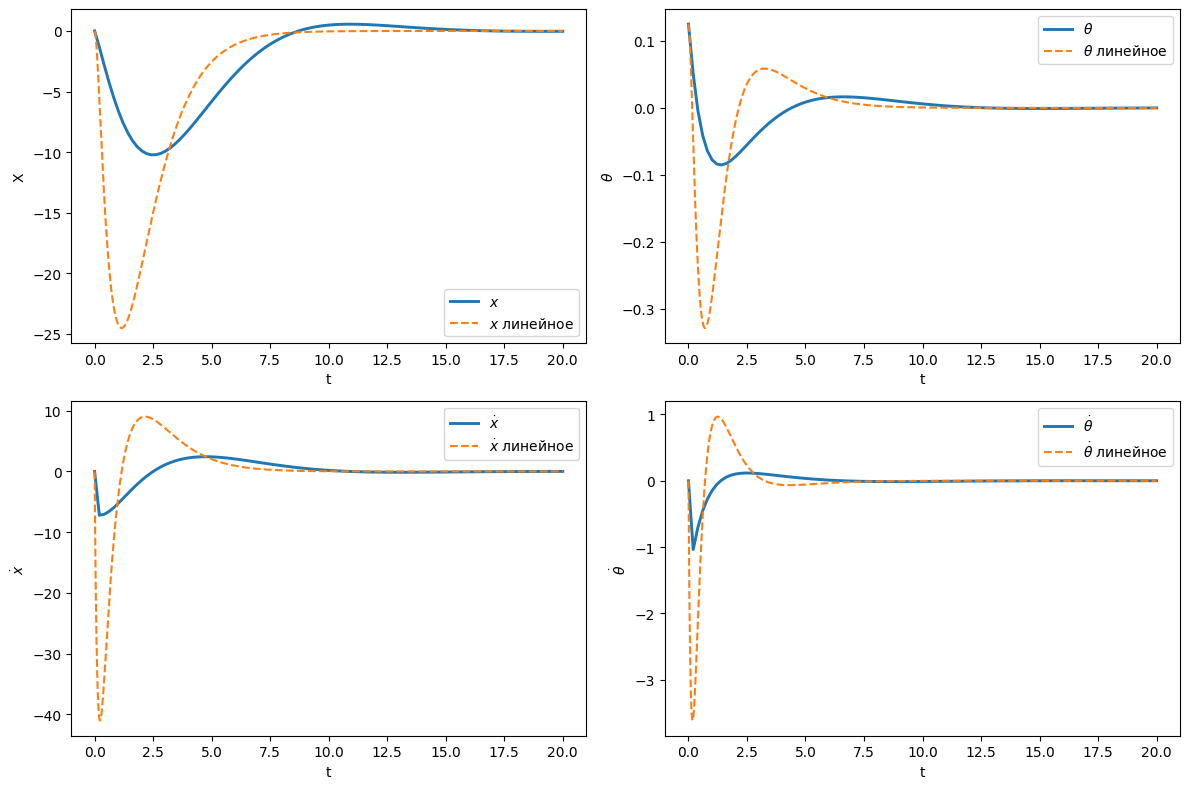

In [54]:
plt.figure(figsize=(12, 8))

# График x1 (позиция)
plt.subplot(2, 2, 1)
#plt.plot(t, x1, label='$x$', color='blue')
plt.plot(sol.t, sol.y[0], label='$x$', linewidth = 2.1)
plt.plot(t, x1, label='$x$ линейное', linestyle = '--')
plt.xlabel('t')
plt.ylabel('X')
plt.grid(False)
plt.legend()

# График x2 (угол)
plt.subplot(2, 2, 2)
#plt.plot(t, x2, label=r'$\theta$', color='blue')
plt.plot(sol.t, sol.y[1]/np.pi, label=r'$\theta$', linewidth = 2.1)
plt.plot(t, x2/np.pi, label=r'$\theta$ линейное', linestyle = '--')
plt.xlabel('t')
plt.ylabel(r'$\theta$')
plt.grid(False)
plt.legend()

# График x3 (скорость позиции)
plt.subplot(2, 2, 3)
#plt.plot(t, x3, label=r'$\dot{x}$', color='blue')
plt.plot(sol.t, sol.y[2], label=r'$\dot{x}$', linewidth = 2.1)
plt.plot(t, x3, label=r'$\dot{x}$ линейное', linestyle = '--')
plt.xlabel('t')
plt.ylabel(r'$\dot{x}$')
plt.grid(False)
plt.legend()

# График x4 (угловая скорость)
plt.subplot(2, 2, 4)
#plt.plot(t, x4, label=r'$\dot{\theta}$', color='blue')
plt.plot(sol.t, sol.y[3], label=r'$\dot{\theta}$', linewidth = 2.1)
plt.plot(t, x4, label=r'$\dot{\theta}$ линейное', linestyle = '--')
plt.xlabel('t')
plt.ylabel(r'$\dot{\theta}$')
plt.grid(False)
plt.legend()

plt.tight_layout()
plt.show()

 Судя по полученным графикам при использовании полученного регулятора система действительно стабилизируется ввертикальном положении

#### Двигаем 2 с.ч. в -1/2

Рассмотрим сдвиг собственных чисел 0 и 0.521 в -1/2

Мы ожидаем, что переходные процессы (возвращение к нулю) будут происходить медленнее, чем в предыдущем случае. Следовательно, время, необходимое для достижения устойчивого состояния, увеличится.

In [156]:
def ackermann_control(A, B, desired_poles):
    n = len(desired_poles)
    A = A.astype(np.float64)
    B = B.astype(np.float64)
    
    C = np.hstack([np.linalg.matrix_power(A, i) @ B for i in range(n)])
    
    if np.linalg.matrix_rank(C) != n:
        raise ValueError("Система не управляема")
    
    poly_coeffs = np.poly(desired_poles)
    
    phi_A = np.zeros_like(A, dtype=np.float64)
    for power, coeff in enumerate(reversed(poly_coeffs)):
        phi_A += coeff * np.linalg.matrix_power(A, power)
    
    e = np.zeros((1, n), dtype=np.float64)
    e[0, -1] = 1
    
    K = -e @ np.linalg.inv(C) @ phi_A
    return K

desired_poles = [-0.5, -2.05945329, -7.50292918, -0.5]
K = ackermann_control(A, B, desired_poles)
print("Вектор управления K:", K)

Вектор управления K: [[   3.65408529 -588.96847917   29.75590131 -285.37942428]]


In [157]:
Ac = A + B @ K
print(Ac)

[[ 0.00000000e+00  0.00000000e+00  1.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]
 [ 3.59353710e+00 -5.79148286e+02  2.17734460e+01 -2.80738187e+02]
 [ 3.94166180e-01 -6.24503598e+01  2.38823907e+00 -3.23358285e+01]]


Для линейной системы

In [158]:
def model(x, t, A, B, K):
    u = np.dot(K, x)  # Управление по обратной связи
    dxdt = np.dot(A, x) + np.dot(B, u)
    return dxdt

t = np.linspace(0, 20, 1000)  # Временной интервал 0-8 секунд
x0 = [0, np.pi/8, 0, 0]         # Начальные условия [x1, x2, x3, x4]

solution = odeint(model, x0, t, args=(A, B, K))
x1 = solution[:, 0]  # Позиция (x)
x2 = solution[:, 1]  # Угол (θ)
x3 = solution[:, 2]  # Скорость позиции (ẋ)
x4 = solution[:, 3]  # Угловая скорость (θ̇)

Для нелинейной системы

In [159]:
g = 9.81
Kt = 1.726
Ks = 4.487
Bcq = 5.4
m =  0.56
l =  0.1778
Bp = 1.4
I = 0.89
M = 1.206

A1 = m + M
C1 = m * l
D1 = I + m * l**2
K1 = Kt*Ks + Bcq

def system(x, Y):
    y1, y2, y3, y4 = Y

    #u = u1 * y1 + u2 * y2 + u3 * y3 + u4 * y4
    f1 = -K1*y3 - C1 * y4**2 * np.sin(y2)
    f2 = -Bp*y4 + C1 * g * np.sin(y2)

    dydt = [
        y3,
        y4,
        (m * y4 * np.cos(y2) - m * y4**2 * np.sin(y2)) / (m + M) + Ac[2][0] * y1 + Ac[2][1] * y2 + Ac[2][2] * y3 + Ac[2][3] * y4,
        (m * l * ((m * y4 * np.cos(y2) - m * y4**2 * np.sin(y2)) / (m + M) + Ac[2][0] * y1 + Ac[2][1] * y2 + Ac[2][2] * y3 + Ac[2][3] * y4) * np.cos(y2) + m * g * l * np.sin(y2)) / (I + m * l**2) +  Ac[3][0] * y1 + Ac[3][1] * y2 + Ac[3][2] * y3 + Ac[3][3] * y4,
    ]

    return dydt


x0 = 0.0
xT = 20.0
y0 = [0.0, np.pi/8, 0.0, 0.0]
x_span = (x0, xT)  # интервал по x

# Временной интервал: от 0 до 8 секунд
t = np.linspace(0, 20, 1000)

# Интегрирование системы
sol = solve_ivp(system, x_span, y0, t_eval=np.linspace(x0, xT, 100))

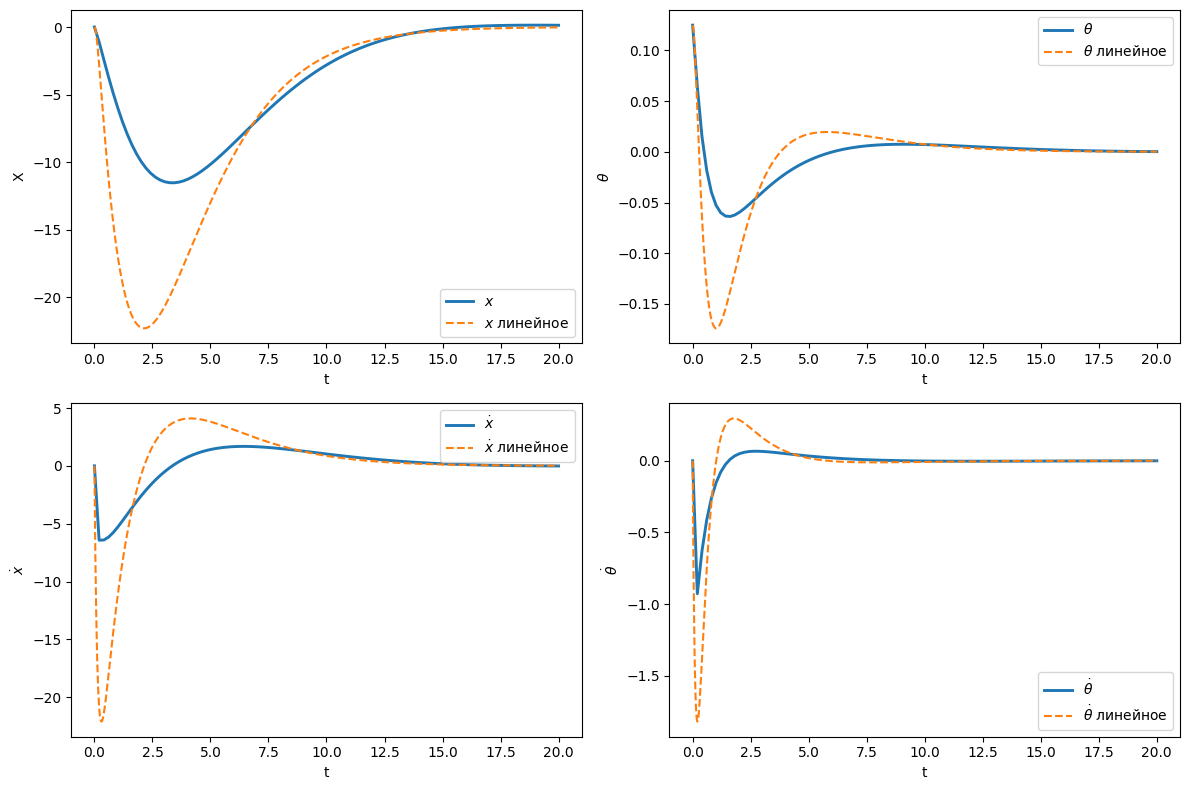

In [160]:
plt.figure(figsize=(12, 8))

# График x1 (позиция)
plt.subplot(2, 2, 1)
#plt.plot(t, x1, label='$x$', color='blue')
plt.plot(sol.t, sol.y[0], label='$x$', linewidth = 2.1)
plt.plot(t, x1, label='$x$ линейное', linestyle = '--')
plt.xlabel('t')
plt.ylabel('X')
plt.grid(False)
plt.legend()

# График x2 (угол)
plt.subplot(2, 2, 2)
#plt.plot(t, x2, label=r'$\theta$', color='blue')
plt.plot(sol.t, sol.y[1]/np.pi, label=r'$\theta$', linewidth = 2.1)
plt.plot(t, x2/np.pi, label=r'$\theta$ линейное', linestyle = '--')
plt.xlabel('t')
plt.ylabel(r'$\theta$')
plt.grid(False)
plt.legend()

# График x3 (скорость позиции)
plt.subplot(2, 2, 3)
#plt.plot(t, x3, label=r'$\dot{x}$', color='blue')
plt.plot(sol.t, sol.y[2], label=r'$\dot{x}$', linewidth = 2.1)
plt.plot(t, x3, label=r'$\dot{x}$ линейное', linestyle = '--')
plt.xlabel('t')
plt.ylabel(r'$\dot{x}$')
plt.grid(False)
plt.legend()

# График x4 (угловая скорость)
plt.subplot(2, 2, 4)
#plt.plot(t, x4, label=r'$\dot{\theta}$', color='blue')
plt.plot(sol.t, sol.y[3], label=r'$\dot{\theta}$', linewidth = 2.1)
plt.plot(t, x4, label=r'$\dot{\theta}$ линейное', linestyle = '--')
plt.xlabel('t')
plt.ylabel(r'$\dot{\theta}$')
plt.grid(False)
plt.legend()

plt.tight_layout()
plt.show()

Уменьшение абсолютной величины собственных значений с -1 до -1/2 действительно привело к замедлению затухания, как и ожидалось.

#### Двигаем 2 с.ч. в -10

Рассмотрим сдвиг собственных чисел 0 и 0.521 в -10

Мы ожидаем, что возвращение к нулю будет происходить быстрее, чем в предыдущих случаях. Следовательно, время, необходимое для достижения устойчивого состояния, уменьшится.

In [34]:
def ackermann_control(A, B, desired_poles):
    n = len(desired_poles)
    A = A.astype(np.float64)
    B = B.astype(np.float64)
    
    C = np.hstack([np.linalg.matrix_power(A, i) @ B for i in range(n)])
    
    if np.linalg.matrix_rank(C) != n:
        raise ValueError("Система не управляема")
    
    poly_coeffs = np.poly(desired_poles)
    
    phi_A = np.zeros_like(A, dtype=np.float64)
    for power, coeff in enumerate(reversed(poly_coeffs)):
        phi_A += coeff * np.linalg.matrix_power(A, power)
    
    e = np.zeros((1, n), dtype=np.float64)
    e[0, -1] = 1
    
    K = -e @ np.linalg.inv(C) @ phi_A
    return K

desired_poles = [-10, -2.05945329, -7.50292918, -10]
K = ackermann_control(A, B, desired_poles)
print("Вектор управления K:", K)

Вектор управления K: [[  1461.63411568 -62535.93845169   3303.69225087 -30309.36407471]]


In [35]:
Ac = A + B @ K
print(Ac)

[[ 0.00000000e+00  0.00000000e+00  1.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]
 [ 1.43741484e+03 -6.14996570e+04  3.24146067e+03 -2.98072254e+04]
 [ 1.57666472e+02 -6.74467001e+03  3.55547753e+02 -3.27102305e+03]]


Для линейной системы

In [36]:
def model(x, t, A, B, K):
    u = np.dot(K, x)  # Управление по обратной связи
    dxdt = np.dot(A, x) + np.dot(B, u)
    return dxdt

t = np.linspace(0, 20, 1000)  # Временной интервал 0-8 секунд
x0 = [0, np.pi/8, 0, 0]         # Начальные условия [x1, x2, x3, x4]

solution = odeint(model, x0, t, args=(A, B, K))
x1 = solution[:, 0]  # Позиция (x)
x2 = solution[:, 1]  # Угол (θ)
x3 = solution[:, 2]  # Скорость позиции (ẋ)
x4 = solution[:, 3]  # Угловая скорость (θ̇)

Для нелинейной системы

In [40]:
g = 9.81
Kt = 1.726
Ks = 4.487
Bcq = 5.4
m =  0.56
l =  0.1778
Bp = 1.4
I = 0.89
M = 1.206

A1 = m + M
C1 = m * l
D1 = I + m * l**2
K1 = Kt*Ks + Bcq

def system(x, Y):
    y1, y2, y3, y4 = Y

    #u = u1 * y1 + u2 * y2 + u3 * y3 + u4 * y4
    f1 = -K1*y3 - C1 * y4**2 * np.sin(y2)
    f2 = -Bp*y4 + C1 * g * np.sin(y2)

    dydt = [
        y3,
        y4,
        (m * y4 * np.cos(y2) - m * y4**2 * np.sin(y2)) / (m + M) + Ac[2][0] * y1 + Ac[2][1] * y2 + Ac[2][2] * y3 + Ac[2][3] * y4,
        (m * l * ((m * y4 * np.cos(y2) - m * y4**2 * np.sin(y2)) / (m + M) + Ac[2][0] * y1 + Ac[2][1] * y2 + Ac[2][2] * y3 + Ac[2][3] * y4) * np.cos(y2) + m * g * l * np.sin(y2)) / (I + m * l**2) +  Ac[3][0] * y1 + Ac[3][1] * y2 + Ac[3][2] * y3 + Ac[3][3] * y4,
    ]

    return dydt


x0 = 0.0
xT = 20.0
y0 = [0.0, np.pi/8, 0.0, 0.0]
x_span = (x0, xT)  # интервал по x

# Временной интервал: от 0 до 8 секунд
t = np.linspace(0, 20, 1000)

# Интегрирование системы
sol = solve_ivp(system, x_span, y0, t_eval=np.linspace(x0, xT, 100))

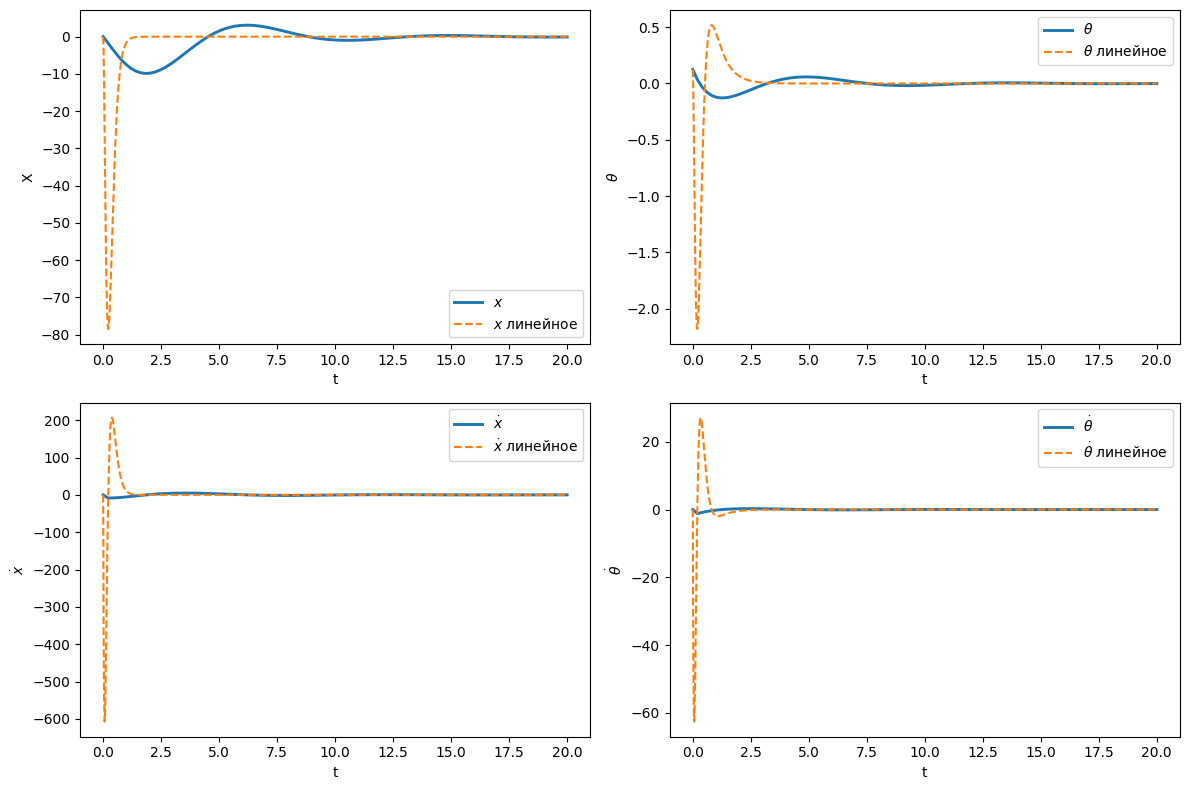

In [41]:
plt.figure(figsize=(12, 8))

# График x1 (позиция)
plt.subplot(2, 2, 1)
#plt.plot(t, x1, label='$x$', color='blue')
plt.plot(sol.t, sol.y[0], label='$x$', linewidth = 2.1)
plt.plot(t, x1, label='$x$ линейное', linestyle = '--')
plt.xlabel('t')
plt.ylabel('X')
plt.grid(False)
plt.legend()

# График x2 (угол)
plt.subplot(2, 2, 2)
#plt.plot(t, x2, label=r'$\theta$', color='blue')
plt.plot(sol.t, sol.y[1]/np.pi, label=r'$\theta$', linewidth = 2.1)
plt.plot(t, x2/np.pi, label=r'$\theta$ линейное', linestyle = '--')
plt.xlabel('t')
plt.ylabel(r'$\theta$')
plt.grid(False)
plt.legend()

# График x3 (скорость позиции)
plt.subplot(2, 2, 3)
#plt.plot(t, x3, label=r'$\dot{x}$', color='blue')
plt.plot(sol.t, sol.y[2], label=r'$\dot{x}$', linewidth = 2.1)
plt.plot(t, x3, label=r'$\dot{x}$ линейное', linestyle = '--')
plt.xlabel('t')
plt.ylabel(r'$\dot{x}$')
plt.grid(False)
plt.legend()

# График x4 (угловая скорость)
plt.subplot(2, 2, 4)
#plt.plot(t, x4, label=r'$\dot{\theta}$', color='blue')
plt.plot(sol.t, sol.y[3], label=r'$\dot{\theta}$', linewidth = 2.1)
plt.plot(t, x4, label=r'$\dot{\theta}$ линейное', linestyle = '--')
plt.xlabel('t')
plt.ylabel(r'$\dot{\theta}$')
plt.grid(False)
plt.legend()

plt.tight_layout()
plt.show()

Как мы видим, более отрицательные собственные значения привели к более быстрому затуханию, как и предполагалось. 

### 5 в

Теперь будем двигать собственные числа 0 и 0.521 в комплексно сопряженные числа в левой полуплоскости комплексной плоскости. Затухания должны иметь колебательный характер 

#### Двигаем 2 с.ч. в -2 +- 3i

Рассмотрим сдвиг собственных чисел 0 и 0.521 в -2 +- 3i

In [55]:
def ackermann_control(A, B, desired_poles):
    n = len(desired_poles)
    A = A.astype(np.float64)
    B = B.astype(np.float64)
    
    C = np.hstack([np.linalg.matrix_power(A, i) @ B for i in range(n)])
    
    if np.linalg.matrix_rank(C) != n:
        raise ValueError("Система не управляема")
    
    poly_coeffs = np.poly(desired_poles)
    
    phi_A = np.zeros_like(A, dtype=np.float64)
    for power, coeff in enumerate(reversed(poly_coeffs)):
        phi_A += coeff * np.linalg.matrix_power(A, power)
    
    e = np.zeros((1, n), dtype=np.float64)
    e[0, -1] = 1
    
    K = -e @ np.linalg.inv(C) @ phi_A
    return K

desired_poles = [-2+3j, -2.05945329, -7.50292918, -2-3j]
K = ackermann_control(A, B, desired_poles)
print("Вектор управления K:", K)

Вектор управления K: [[  190.01243504 -8675.207539     456.58683891 -4204.52607265]]


In [56]:
Ac = A + B @ K
print(Ac)

[[ 0.00000000e+00  0.00000000e+00  1.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]
 [ 1.86863929e+02 -8.53139837e+03  4.41531795e+02 -4.13494458e+03]
 [ 2.04966414e+01 -9.34712967e+02  4.84304923e+01 -4.55094177e+02]]


In [57]:
eigenvalues, eigenvectors = np.linalg.eig(Ac)

print("Собственные числа:", eigenvalues)

Собственные числа: [-7.50292918+0.j -2.        +3.j -2.        -3.j -2.05945329+0.j]


Для линейной системы

In [58]:
def model(x, t, A, B, K):
    u = np.dot(K, x)  # Управление по обратной связи
    dxdt = np.dot(A, x) + np.dot(B, u)
    return dxdt

t = np.linspace(0, 8, 1000)  # Временной интервал 0-8 секунд
x0 = [0, 0.15, 0, 0]         # Начальные условия [x1, x2, x3, x4]

solution = odeint(model, x0, t, args=(A, B, K))
x1 = solution[:, 0]  # Позиция (x)
x2 = solution[:, 1]  # Угол (θ)
x3 = solution[:, 2]  # Скорость позиции (ẋ)
x4 = solution[:, 3]  # Угловая скорость (θ̇)

Для нелинейной системы

In [59]:
g = 9.81
Kt = 1.726
Ks = 4.487
Bcq = 5.4
m =  0.56
l =  0.1778
Bp = 1.4
I = 0.89
M = 1.206

A1 = m + M
C1 = m * l
D1 = I + m * l**2
K1 = Kt*Ks + Bcq

def system(x, Y):
    y1, y2, y3, y4 = Y

    #u = u1 * y1 + u2 * y2 + u3 * y3 + u4 * y4
    f1 = -K1*y3 - C1 * y4**2 * np.sin(y2)
    f2 = -Bp*y4 + C1 * g * np.sin(y2)

    dydt = [
        y3,
        y4,
        (m * y4 * np.cos(y2) - m * y4**2 * np.sin(y2)) / (m + M) + Ac[2][0] * y1 + Ac[2][1] * y2 + Ac[2][2] * y3 + Ac[2][3] * y4,
        (m * l * ((m * y4 * np.cos(y2) - m * y4**2 * np.sin(y2)) / (m + M) + Ac[2][0] * y1 + Ac[2][1] * y2 + Ac[2][2] * y3 + Ac[2][3] * y4) * np.cos(y2) + m * g * l * np.sin(y2)) / (I + m * l**2) +  Ac[3][0] * y1 + Ac[3][1] * y2 + Ac[3][2] * y3 + Ac[3][3] * y4,
    ]

    return dydt


x0 = 0.0
xT = 20.0
y0 = [0.0, np.pi/8, 0.0, 0.0]
x_span = (x0, xT)  # интервал по x

# Временной интервал: от 0 до 8 секунд
t = np.linspace(0, 20, 1000)

# Интегрирование системы
sol = solve_ivp(system, x_span, y0, t_eval=np.linspace(x0, xT, 100))

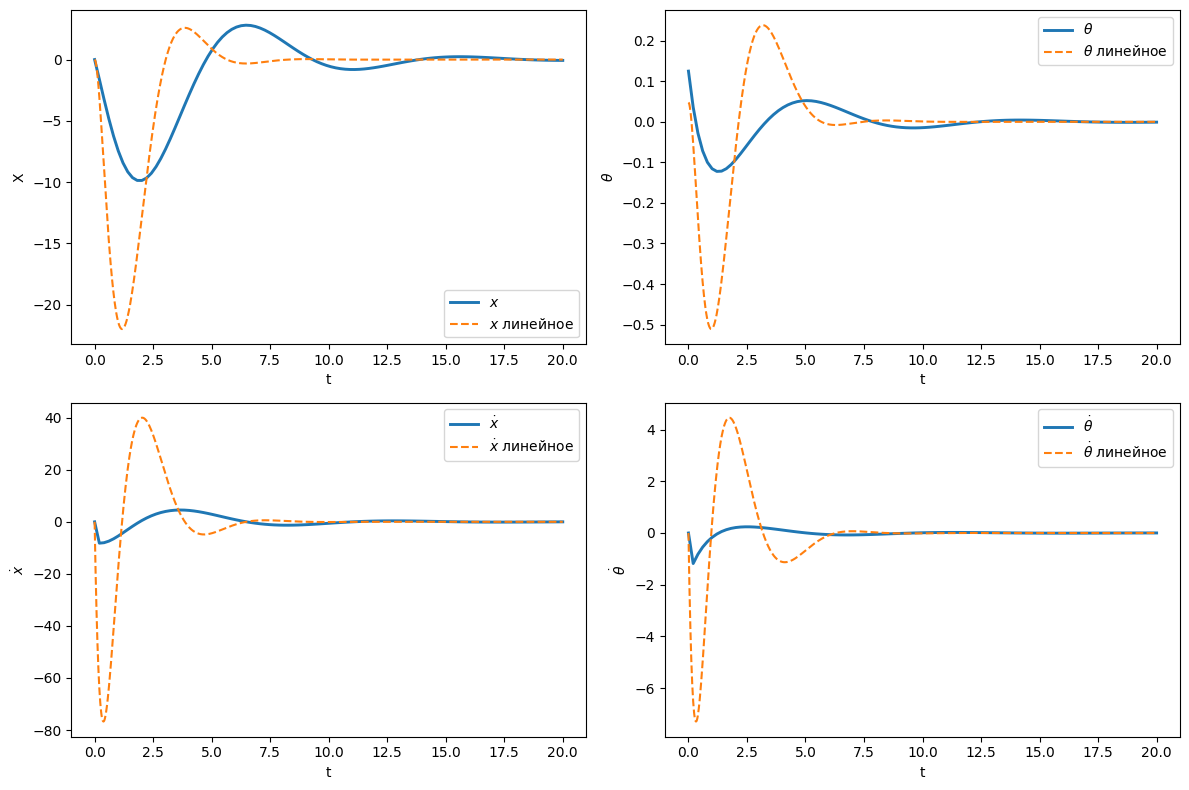

In [60]:
plt.figure(figsize=(12, 8))

# График x1 (позиция)
plt.subplot(2, 2, 1)
#plt.plot(t, x1, label='$x$', color='blue')
plt.plot(sol.t, sol.y[0], label='$x$', linewidth = 2.1)
plt.plot(t, x1, label='$x$ линейное', linestyle = '--')
plt.xlabel('t')
plt.ylabel('X')
plt.grid(False)
plt.legend()

# График x2 (угол)
plt.subplot(2, 2, 2)
#plt.plot(t, x2, label=r'$\theta$', color='blue')
plt.plot(sol.t, sol.y[1]/np.pi, label=r'$\theta$', linewidth = 2.1)
plt.plot(t, x2/np.pi, label=r'$\theta$ линейное', linestyle = '--')
plt.xlabel('t')
plt.ylabel(r'$\theta$')
plt.grid(False)
plt.legend()

# График x3 (скорость позиции)
plt.subplot(2, 2, 3)
#plt.plot(t, x3, label=r'$\dot{x}$', color='blue')
plt.plot(sol.t, sol.y[2], label=r'$\dot{x}$', linewidth = 2.1)
plt.plot(t, x3, label=r'$\dot{x}$ линейное', linestyle = '--')
plt.xlabel('t')
plt.ylabel(r'$\dot{x}$')
plt.grid(False)
plt.legend()

# График x4 (угловая скорость)
plt.subplot(2, 2, 4)
#plt.plot(t, x4, label=r'$\dot{\theta}$', color='blue')
plt.plot(sol.t, sol.y[3], label=r'$\dot{\theta}$', linewidth = 2.1)
plt.plot(t, x4, label=r'$\dot{\theta}$ линейное', linestyle = '--')
plt.xlabel('t')
plt.ylabel(r'$\dot{\theta}$')
plt.grid(False)
plt.legend()

plt.tight_layout()
plt.show()

Судя по полученным графикам при использовании полученного регулятора система действительно стабилизируется в вертикальном положении. При этом появились заметные колебания всех траекторий.

#### Двигаем 2 с.ч. в -1/2 +- 2i

Рассмотрим сдвиг собственных чисел 0 и 0.521 в -1/2 +- 2i

Мы уменьшили действительную часть комплексно-сопряженных собственных чисел. Ожидаем увидеть более медленное затухание колебаний, а также увеличение времени переходного процесса.

In [18]:
def ackermann_control(A, B, desired_poles):
    n = len(desired_poles)
    A = A.astype(np.float64)
    B = B.astype(np.float64)
    
    C = np.hstack([np.linalg.matrix_power(A, i) @ B for i in range(n)])
    
    if np.linalg.matrix_rank(C) != n:
        raise ValueError("Система не управляема")
    
    poly_coeffs = np.poly(desired_poles)
    
    phi_A = np.zeros_like(A, dtype=np.float64)
    for power, coeff in enumerate(reversed(poly_coeffs)):
        phi_A += coeff * np.linalg.matrix_power(A, power)
    
    e = np.zeros((1, n), dtype=np.float64)
    e[0, -1] = 1
    
    K = -e @ np.linalg.inv(C) @ phi_A
    return K

desired_poles = [-1/2+2j, -2.05945329, -7.50292918, -1/2-2j]
K = ackermann_control(A, B, desired_poles)
print("Вектор управления K:", K)

Вектор управления K: [[   62.11944992 -2848.78376204   149.89774232 -1380.68943356]]


In [19]:
Ac = A + B @ K
print(Ac)

[[ 0.00000000e+00  0.00000000e+00  1.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]
 [ 6.10901306e+01 -2.80151843e+03  1.39924537e+02 -1.35789891e+03]
 [ 6.70082506e+00 -3.06216634e+02  1.53479395e+01 -1.50486919e+02]]


Для линейной системы

In [20]:
def model(x, t, A, B, K):
    u = np.dot(K, x)  # Управление по обратной связи
    dxdt = np.dot(A, x) + np.dot(B, u)
    return dxdt

t = np.linspace(0, 8, 1000)  # Временной интервал 0-8 секунд
x0 = [0, 0.15, 0, 0]         # Начальные условия [x1, x2, x3, x4]

solution = odeint(model, x0, t, args=(A, B, K))
x1 = solution[:, 0]  # Позиция (x)
x2 = solution[:, 1]  # Угол (θ)
x3 = solution[:, 2]  # Скорость позиции (ẋ)
x4 = solution[:, 3]  # Угловая скорость (θ̇)

Для нелинейной системы

In [27]:
g = 9.81
Kt = 1.726
Ks = 4.487
Bcq = 5.4
m =  0.56
l =  0.1778
Bp = 1.4
I = 0.89
M = 1.206

A1 = m + M
C1 = m * l
D1 = I + m * l**2
K1 = Kt*Ks + Bcq

def system(x, Y):
    y1, y2, y3, y4 = Y

    #u = u1 * y1 + u2 * y2 + u3 * y3 + u4 * y4
    f1 = -K1*y3 - C1 * y4**2 * np.sin(y2)
    f2 = -Bp*y4 + C1 * g * np.sin(y2)

    dydt = [
        y3,
        y4,
        (m * y4 * np.cos(y2) - m * y4**2 * np.sin(y2)) / (m + M) + Ac[2][0] * y1 + Ac[2][1] * y2 + Ac[2][2] * y3 + Ac[2][3] * y4,
        (m * l * ((m * y4 * np.cos(y2) - m * y4**2 * np.sin(y2)) / (m + M) + Ac[2][0] * y1 + Ac[2][1] * y2 + Ac[2][2] * y3 + Ac[2][3] * y4) * np.cos(y2) + m * g * l * np.sin(y2)) / (I + m * l**2) +  Ac[3][0] * y1 + Ac[3][1] * y2 + Ac[3][2] * y3 + Ac[3][3] * y4,
    ]

    return dydt


x0 = 0.0
xT = 50.0
y0 = [0.0, np.pi/8, 0.0, 0.0]
x_span = (x0, xT)  # интервал по x

# Временной интервал: от 0 до 8 секунд
t = np.linspace(0, 50, 1000)

# Интегрирование системы
sol = solve_ivp(system, x_span, y0, t_eval=np.linspace(x0, xT, 100))

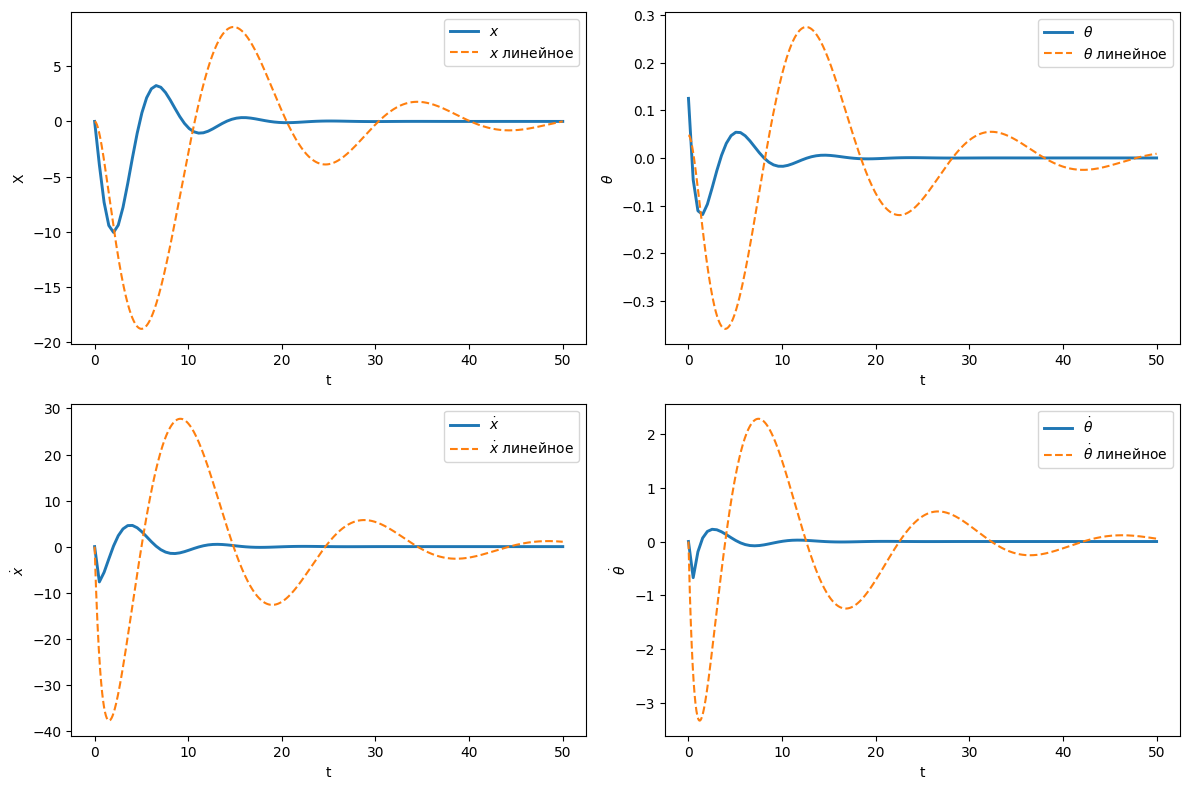

In [28]:
plt.figure(figsize=(12, 8))

# График x1 (позиция)
plt.subplot(2, 2, 1)
#plt.plot(t, x1, label='$x$', color='blue')
plt.plot(sol.t, sol.y[0], label='$x$', linewidth = 2.1)
plt.plot(t, x1, label='$x$ линейное', linestyle = '--')
plt.xlabel('t')
plt.ylabel('X')
plt.grid(False)
plt.legend()

# График x2 (угол)
plt.subplot(2, 2, 2)
#plt.plot(t, x2, label=r'$\theta$', color='blue')
plt.plot(sol.t, sol.y[1]/np.pi, label=r'$\theta$', linewidth = 2.1)
plt.plot(t, x2/np.pi, label=r'$\theta$ линейное', linestyle = '--')
plt.xlabel('t')
plt.ylabel(r'$\theta$')
plt.grid(False)
plt.legend()

# График x3 (скорость позиции)
plt.subplot(2, 2, 3)
#plt.plot(t, x3, label=r'$\dot{x}$', color='blue')
plt.plot(sol.t, sol.y[2], label=r'$\dot{x}$', linewidth = 2.1)
plt.plot(t, x3, label=r'$\dot{x}$ линейное', linestyle = '--')
plt.xlabel('t')
plt.ylabel(r'$\dot{x}$')
plt.grid(False)
plt.legend()

# График x4 (угловая скорость)
plt.subplot(2, 2, 4)
#plt.plot(t, x4, label=r'$\dot{\theta}$', color='blue')
plt.plot(sol.t, sol.y[3], label=r'$\dot{\theta}$', linewidth = 2.1)
plt.plot(t, x4, label=r'$\dot{\theta}$ линейное', linestyle = '--')
plt.xlabel('t')
plt.ylabel(r'$\dot{\theta}$')
plt.grid(False)
plt.legend()

plt.tight_layout()
plt.show()

На графиках видно, что колебания затухают медленнее. Время переходного процесса заметно увеличивается.

#### Двигаем 2 с.ч. в -1/2 +- 8i

Рассмотрим сдвиг собственных чисел 0 и 0.521 в -1/2 +- 8i

Мы увеличили мнимую часть комплексно-сопряженных собственных чисел. Ожидаем увидеть увеличение частоты колебаний по сравнению в предыдущим случаем. 

In [91]:
def ackermann_control(A, B, desired_poles):
    n = len(desired_poles)
    A = A.astype(np.float64)
    B = B.astype(np.float64)
    
    C = np.hstack([np.linalg.matrix_power(A, i) @ B for i in range(n)])
    
    if np.linalg.matrix_rank(C) != n:
        raise ValueError("Система не управляема")
    
    poly_coeffs = np.poly(desired_poles)
    
    phi_A = np.zeros_like(A, dtype=np.float64)
    for power, coeff in enumerate(reversed(poly_coeffs)):
        phi_A += coeff * np.linalg.matrix_power(A, power)
    
    e = np.zeros((1, n), dtype=np.float64)
    e[0, -1] = 1
    
    K = -e @ np.linalg.inv(C) @ phi_A
    return K

desired_poles = [-1/2+8j, -2.05945329, -7.50292918, -1/2-8j]
K = ackermann_control(A, B, desired_poles)
print("Вектор управления K:", K)

Вектор управления K: [[   939.09991933 -36746.01300511   1952.02535742 -17810.33957275]]


In [92]:
Ac = A + B @ K
print(Ac)

[[ 0.00000000e+00  0.00000000e+00  1.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]
 [ 9.23539034e+02 -3.61370706e+04  1.91219090e+03 -1.75153097e+04]
 [ 1.01300708e+02 -3.96271075e+03  2.09743445e+02 -1.92275328e+03]]


Для линейной системы

In [93]:
def model(x, t, A, B, K):
    u = np.dot(K, x)  # Управление по обратной связи
    dxdt = np.dot(A, x) + np.dot(B, u)
    return dxdt

t = np.linspace(0, 8, 1000)  # Временной интервал 0-8 секунд
x0 = [0, 0.15, 0, 0]         # Начальные условия [x1, x2, x3, x4]

solution = odeint(model, x0, t, args=(A, B, K))
x1 = solution[:, 0]  # Позиция (x)
x2 = solution[:, 1]  # Угол (θ)
x3 = solution[:, 2]  # Скорость позиции (ẋ)
x4 = solution[:, 3]  # Угловая скорость (θ̇)

Для нелинейной системы

In [94]:
g = 9.81
Kt = 1.726
Ks = 4.487
Bcq = 5.4
m =  0.56
l =  0.1778
Bp = 1.4
I = 0.89
M = 1.206

A1 = m + M
C1 = m * l
D1 = I + m * l**2
K1 = Kt*Ks + Bcq

def system(x, Y):
    y1, y2, y3, y4 = Y

    #u = u1 * y1 + u2 * y2 + u3 * y3 + u4 * y4
    f1 = -K1*y3 - C1 * y4**2 * np.sin(y2)
    f2 = -Bp*y4 + C1 * g * np.sin(y2)

    dydt = [
        y3,
        y4,
        (m * y4 * np.cos(y2) - m * y4**2 * np.sin(y2)) / (m + M) + Ac[2][0] * y1 + Ac[2][1] * y2 + Ac[2][2] * y3 + Ac[2][3] * y4,
        (m * l * ((m * y4 * np.cos(y2) - m * y4**2 * np.sin(y2)) / (m + M) + Ac[2][0] * y1 + Ac[2][1] * y2 + Ac[2][2] * y3 + Ac[2][3] * y4) * np.cos(y2) + m * g * l * np.sin(y2)) / (I + m * l**2) +  Ac[3][0] * y1 + Ac[3][1] * y2 + Ac[3][2] * y3 + Ac[3][3] * y4,
    ]

    return dydt


x0 = 0.0
xT = 20.0
y0 = [0.0, np.pi/8, 0.0, 0.0]
x_span = (x0, xT)  # интервал по x

# Временной интервал: от 0 до 8 секунд
t = np.linspace(0, 20, 1000)

# Интегрирование системы
sol = solve_ivp(system, x_span, y0, t_eval=np.linspace(x0, xT, 100))

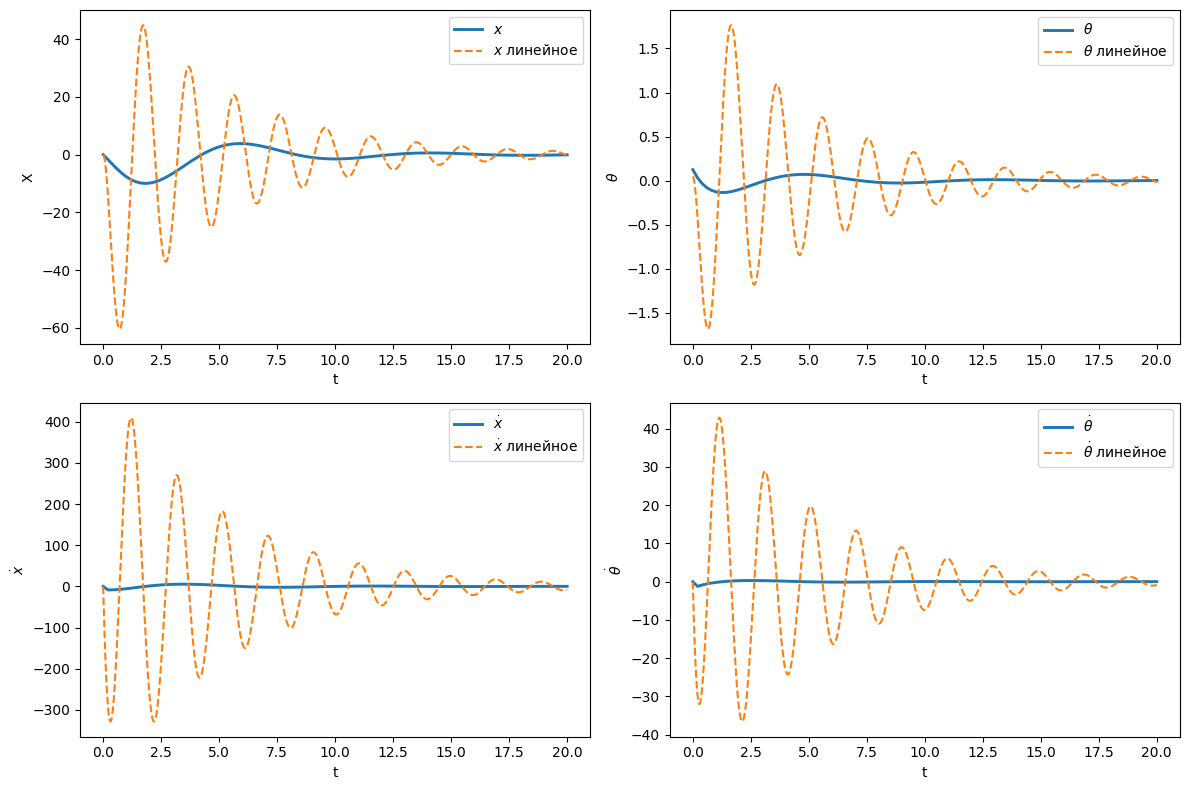

In [95]:
plt.figure(figsize=(12, 8))

# График x1 (позиция)
plt.subplot(2, 2, 1)
#plt.plot(t, x1, label='$x$', color='blue')
plt.plot(sol.t, sol.y[0], label='$x$', linewidth = 2.1)
plt.plot(t, x1, label='$x$ линейное', linestyle = '--')
plt.xlabel('t')
plt.ylabel('X')
plt.grid(False)
plt.legend()

# График x2 (угол)
plt.subplot(2, 2, 2)
#plt.plot(t, x2, label=r'$\theta$', color='blue')
plt.plot(sol.t, sol.y[1]/np.pi, label=r'$\theta$', linewidth = 2.1)
plt.plot(t, x2/np.pi, label=r'$\theta$ линейное', linestyle = '--')
plt.xlabel('t')
plt.ylabel(r'$\theta$')
plt.grid(False)
plt.legend()

# График x3 (скорость позиции)
plt.subplot(2, 2, 3)
#plt.plot(t, x3, label=r'$\dot{x}$', color='blue')
plt.plot(sol.t, sol.y[2], label=r'$\dot{x}$', linewidth = 2.1)
plt.plot(t, x3, label=r'$\dot{x}$ линейное', linestyle = '--')
plt.xlabel('t')
plt.ylabel(r'$\dot{x}$')
plt.grid(False)
plt.legend()

# График x4 (угловая скорость)
plt.subplot(2, 2, 4)
#plt.plot(t, x4, label=r'$\dot{\theta}$', color='blue')
plt.plot(sol.t, sol.y[3], label=r'$\dot{\theta}$', linewidth = 2.1)
plt.plot(t, x4, label=r'$\dot{\theta}$ линейное', linestyle = '--')
plt.xlabel('t')
plt.ylabel(r'$\dot{\theta}$')
plt.grid(False)
plt.legend()

plt.tight_layout()
plt.show()

На графике, линейные системы демонстрируют более быстрые колебания, чем в предыдущем случае. Колебания затухают примерно с той же скоростью, но из-за высокой частоты их гораздо больше в течение определенного временного интервала. 

### 6


In [6]:
P_ = np.array([
    [0.00327109, 0.88683569, 0.00170434, 0.46207018],
    [1,     0,      0,     0],
    [0,     1,      0,     0],
    [0,     0,      1,     0]
]) 
P = np.linalg.inv(P_)

print("P:\n", P) 

P:
 [[ 0.          1.          0.          0.        ]
 [ 0.          0.          1.          0.        ]
 [ 0.          0.          0.          1.        ]
 [ 2.16417342 -0.00707921 -1.91926622 -0.00368849]]


In [7]:
C = np.array([
    [1,     0,      0,     0],
    [0,     1,      0,     0],
]) 

Theta1, Theta2, lambda_ = sp.symbols('Theta1 Theta2 lambda')

L_hat = sp.Matrix([
    [Theta1, Theta2, 0, 0],
    [Theta1, Theta2, 0, 0]
])

term1 = P_ @ A.T @ P

term2 = P_ @ C.T @ L_hat

result = term1 - term2

sp.pprint(result, wrap_line=False)

⎡0.521032494481899 - 0.89010678⋅Θ₁  -0.89010678⋅Θ₂ - 4.18237479361207e-9  -3.17562757049169e-8  3.32870047237373e-8⎤
⎢                                                                                                                  ⎥
⎢             -1.0⋅Θ₁                             -1.0⋅Θ₂                          0                     0         ⎥
⎢                                                                                                                  ⎥
⎢      2.34092145916016 - Θ₁             -Θ₂ - 0.00765736477584422         -2.07601269747011     0.056995273920295 ⎥
⎢                                                                                                                  ⎥
⎣        -1.77793338665568                    1.00581578012176              1.57673478172883     -7.48636979701179 ⎦


In [8]:
A_hat = sp.Matrix([
    [0.521032494481899 - 0.89010678*Theta1,     -0.89010678*Theta2 - 4.18237479361207e-9],
    [-1.0*Theta1,     -1.0*Theta2],
])

char_poly = (A_hat - lambda_ * sp.eye(2)).det()

char_poly_simplified = sp.simplify(char_poly)

print("Характеристический полином:")
sp.pprint(char_poly_simplified, wrap_line=False)

Характеристический полином:
                                                                              2                      
0.89010678⋅Θ₁⋅λ - 4.18237479361207e-9⋅Θ₁ + 1.0⋅Θ₂⋅λ - 0.521032494481899⋅Θ₂ + λ  - 0.521032494481899⋅λ


### 6 a

#### Двигаем 2 с.ч. в -1

In [68]:
eq1 = char_poly.subs(lambda_, -1)

# Находим производную полинома и подставляем λ = -1
char_poly_derivative = sp.diff(char_poly, lambda_)
eq2 = char_poly_derivative.subs(lambda_, -1)

# 3. Решаем систему уравнений
solutions = sp.solve([eq1, eq2], [Theta1, Theta2], dict=True)

print("\nНайденные решения:")
for sol in solutions:
    print(f"Θ1 = {sol[Theta1].evalf()}, Θ2 = {sol[Theta2].evalf()}")


Найденные решения:
Θ1 = 4.98850107343890, Θ2 = -1.91926613302334


In [69]:
L_hat = np.array([
    [4.98850107343890, -1.91926613302334, 0, 0],
    [4.98850107343890, -1.91926613302334, 0, 0]
])

L = (L_hat @ P_).T
print("L:\n", L)

L:
 [[-1.9029483  -1.9029483 ]
 [ 4.42398079  4.42398079]
 [ 0.0085021   0.0085021 ]
 [ 2.30503759  2.30503759]]


In [70]:
Ac = A - L @ C
Ac

array([[ 1.9029483 ,  1.9029483 ,  1.        ,  0.        ],
       [-4.42398079, -4.42398079,  0.        ,  1.        ],
       [-0.0085021 ,  0.0524829 , -7.4894    , -0.0875    ],
       [-2.30503759, -1.22336759, -0.82153   , -1.55195   ]])

In [71]:
g = 9.81
Kt = 1.726
Ks = 4.487
Bcq = 5.4
m =  0.56
l =  0.1778
Bp = 1.4
I = 0.89
M = 1.206

A1 = m + M
C1 = m * l
D1 = I + m * l**2
K1 = Kt*Ks + Bcq

def systemLinal(x, Y):
    x, fi, y1, y2 = Y
    tu = 0
    return [Ac[0][0] * x + Ac[0][1] * fi + y1, Ac[1][0] * x + Ac[1][1] * fi + y2, Ac[2][0] * x + Ac[2][1]*fi + Ac[2][2] * y1 + Ac[2][3] * y2, Ac[3][0] * x + Ac[3][1] *  fi + Ac[3][2] * y1 + Ac[3][3] * y2]

def system(x, Y):
    y1, y2, y3, y4 = Y

    #u = u1 * y1 + u2 * y2 + u3 * y3 + u4 * y4
    f1 = -K1*y3 - C1 * y4**2 * np.sin(y2)
    f2 = -Bp*y4 + C1 * g * np.sin(y2)

    dydt = [
        -L[0][0] * y1 + -L[0][1] * y2 + y3,
        -L[1][0] * y1 + -L[1][1] * y2 + y4,
        (f1*D1 + f2 * C1 * np.cos(y2))/(A1*D1-(C1*np.cos(y2))**2) + -L[2][0] * y1 + -L[2][1] * y2,
        (f1 * C1 * np.cos(y2) + f2 * A1)/(A1*D1 - (C1*np.cos(y2))**2) + -L[3][0] * y1 + -L[3][1] * y2,
    ]

    return dydt


# Начальные условия
x0 = 0.0
xT = 20.0
y0 = [0.0, np.pi/8, 0.0, 0.0] 
x_span = (x0, xT)  # интервал по x

# Решаем систему
sol = solve_ivp(system, x_span, y0, t_eval=np.linspace(x0, xT, 100))
solLineal = solve_ivp(systemLinal, x_span, y0, t_eval=np.linspace(x0, xT, 100))

U = 7.0 * sol.y[0] + 92 * sol.y[1] + 52 * sol.y[2] - 8.0 * sol.y[3]
U_lin = 7.0 * solLineal.y[0] + 92 * solLineal.y[1] + 52 * solLineal.y[2] - 8.0 * solLineal.y[3]

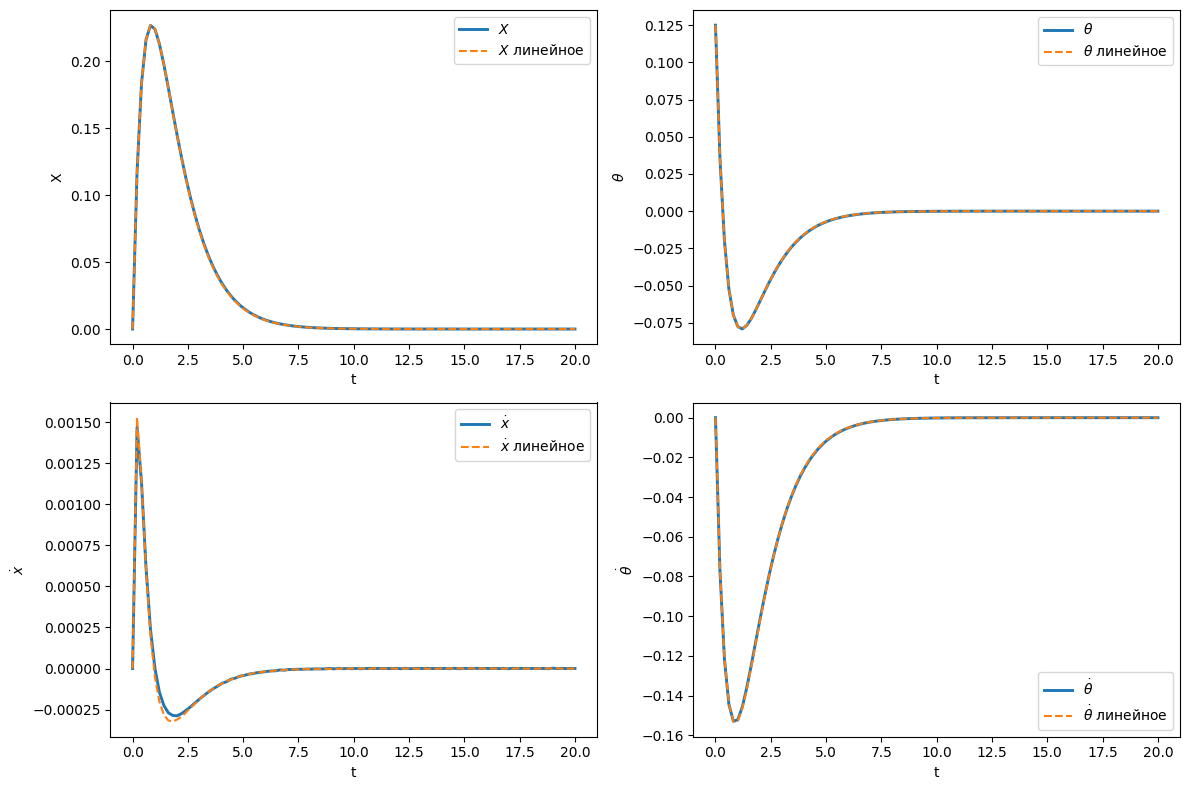

In [72]:
plt.figure(figsize=(12, 8))

# График x1 (позиция)
plt.subplot(2, 2, 1)
plt.plot(sol.t, sol.y[0], label='$X$', linewidth = 2.1)
plt.plot(solLineal.t, solLineal.y[0], label='$X$ линейное', linestyle = '--')
#plt.plot(t, x1, label='$x$', color='blue')
plt.xlabel('t')
plt.ylabel('X')
plt.grid(False)
plt.legend()

# График x2 (угол)
plt.subplot(2, 2, 2)
plt.plot(sol.t, sol.y[1]/np.pi, label=r'$\theta$', linewidth = 2.1)
plt.plot(solLineal.t, solLineal.y[1]/np.pi, label=r'$\theta$ линейное', linestyle = '--')
#plt.plot(t, x2, label=r'$\theta$', color='green')
plt.xlabel('t')
plt.ylabel(r'$\theta$')
plt.grid(False)
plt.legend()

# График x3 (скорость позиции)
plt.subplot(2, 2, 3)
plt.plot(sol.t, sol.y[2], label=r'$\dot{x}$', linewidth = 2.1)
plt.plot(solLineal.t, solLineal.y[2], label=r'$\dot{x}$ линейное', linestyle = '--')
#plt.plot(t, x3, label=r'$\dot{x}$', color='red')
plt.xlabel('t')
plt.ylabel(r'$\dot{x}$')
plt.grid(False)
plt.legend()

# График x4 (угловая скорость)
plt.subplot(2, 2, 4)
plt.plot(sol.t, sol.y[3], label=r'$\dot{\theta}$', linewidth = 2.1)
plt.plot(solLineal.t, solLineal.y[3], label=r'$\dot{\theta}$ линейное', linestyle = '--')
#plt.plot(t, x4, label=r'$\dot{\theta}$', color='purple')
plt.xlabel('t')
plt.ylabel(r'$\dot{\theta}$')
plt.grid(False)
plt.legend()

plt.tight_layout()
plt.show()

#### Двигаем 2 с.ч. в -1/2

In [63]:
eq1 = char_poly.subs(lambda_, -1/2)

# Находим производную полинома и подставляем λ = -1
char_poly_derivative = sp.diff(char_poly, lambda_)
eq2 = char_poly_derivative.subs(lambda_, -1/2)

# 3. Решаем систему уравнений
solutions = sp.solve([eq1, eq2], [Theta1, Theta2], dict=True)

print("\nНайденные решения:")
for sol in solutions:
    print(f"Θ1 = {sol[Theta1].evalf()}, Θ2 = {sol[Theta2].evalf()}")


Найденные решения:
Θ1 = 2.24787528949150, Θ2 = -0.479816541288949


In [64]:
L_hat = np.array([
    [2.24787528949150, -0.479816541288949, 0, 0],
    [2.24787528949150, -0.479816541288949, 0, 0]
])

L = (L_hat @ P_).T
print("L:\n", L)

L:
 [[-0.47246354 -0.47246354]
 [ 1.99349603  1.99349603]
 [ 0.00383114  0.00383114]
 [ 1.03867614  1.03867614]]


In [65]:
Ac = A - L @ C
Ac

array([[ 4.72463539e-01,  4.72463539e-01,  1.00000000e+00,
         0.00000000e+00],
       [-1.99349603e+00, -1.99349603e+00,  0.00000000e+00,
         1.00000000e+00],
       [-3.83114377e-03,  5.71538562e-02, -7.48940000e+00,
        -8.75000000e-02],
       [-1.03867614e+00,  4.29938604e-02, -8.21530000e-01,
        -1.55195000e+00]])

In [66]:
g = 9.81
Kt = 1.726
Ks = 4.487
Bcq = 5.4
m =  0.56
l =  0.1778
Bp = 1.4
I = 0.89
M = 1.206

A1 = m + M
C1 = m * l
D1 = I + m * l**2
K1 = Kt*Ks + Bcq

def systemLinal(x, Y):
    x, fi, y1, y2 = Y
    tu = 0
    return [Ac[0][0] * x + Ac[0][1] * fi + y1, Ac[1][0] * x + Ac[1][1] * fi + y2, Ac[2][0] * x + Ac[2][1]*fi + Ac[2][2] * y1 + Ac[2][3] * y2, Ac[3][0] * x + Ac[3][1] *  fi + Ac[3][2] * y1 + Ac[3][3] * y2]

def system(x, Y):
    y1, y2, y3, y4 = Y

    #u = u1 * y1 + u2 * y2 + u3 * y3 + u4 * y4
    f1 = -K1*y3 - C1 * y4**2 * np.sin(y2)
    f2 = -Bp*y4 + C1 * g * np.sin(y2)

    dydt = [
        -L[0][0] * y1 + -L[0][1] * y2 + y3,
        -L[1][0] * y1 + -L[1][1] * y2 + y4,
        (f1*D1 + f2 * C1 * np.cos(y2))/(A1*D1-(C1*np.cos(y2))**2) + -L[2][0] * y1 + -L[2][1] * y2,
        (f1 * C1 * np.cos(y2) + f2 * A1)/(A1*D1 - (C1*np.cos(y2))**2) + -L[3][0] * y1 + -L[3][1] * y2,
    ]

    return dydt


# Начальные условия
x0 = 0.0
xT = 20.0
y0 = [0.0, np.pi/8, 0.0, 0.0] 
x_span = (x0, xT)  # интервал по x

# Решаем систему
sol = solve_ivp(system, x_span, y0, t_eval=np.linspace(x0, xT, 100))
solLineal = solve_ivp(systemLinal, x_span, y0, t_eval=np.linspace(x0, xT, 100))

U = 7.0 * sol.y[0] + 92 * sol.y[1] + 52 * sol.y[2] - 8.0 * sol.y[3]
U_lin = 7.0 * solLineal.y[0] + 92 * solLineal.y[1] + 52 * solLineal.y[2] - 8.0 * solLineal.y[3]

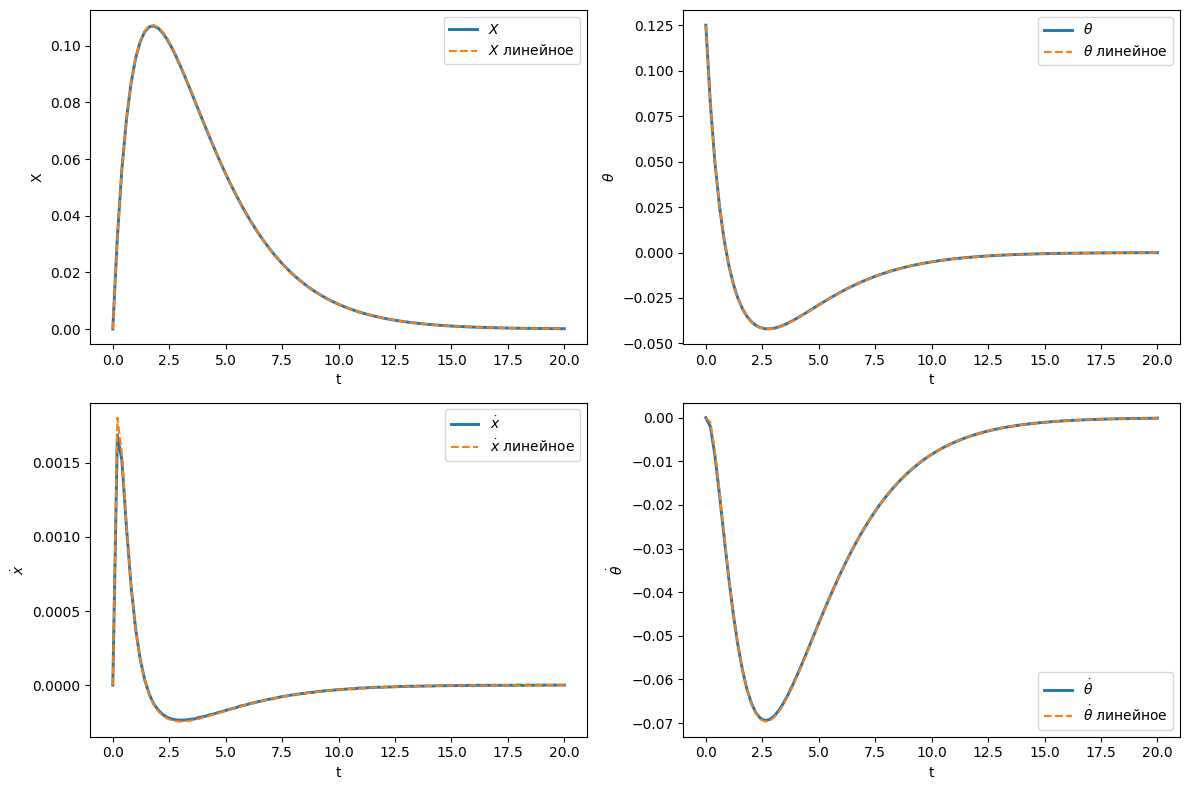

In [67]:
plt.figure(figsize=(12, 8))

# График x1 (позиция)
plt.subplot(2, 2, 1)
plt.plot(sol.t, sol.y[0], label='$X$', linewidth = 2.1)
plt.plot(solLineal.t, solLineal.y[0], label='$X$ линейное', linestyle = '--')
#plt.plot(t, x1, label='$x$', color='blue')
plt.xlabel('t')
plt.ylabel('X')
plt.grid(False)
plt.legend()

# График x2 (угол)
plt.subplot(2, 2, 2)
plt.plot(sol.t, sol.y[1]/np.pi, label=r'$\theta$', linewidth = 2.1)
plt.plot(solLineal.t, solLineal.y[1]/np.pi, label=r'$\theta$ линейное', linestyle = '--')
#plt.plot(t, x2, label=r'$\theta$', color='green')
plt.xlabel('t')
plt.ylabel(r'$\theta$')
plt.grid(False)
plt.legend()

# График x3 (скорость позиции)
plt.subplot(2, 2, 3)
plt.plot(sol.t, sol.y[2], label=r'$\dot{x}$', linewidth = 2.1)
plt.plot(solLineal.t, solLineal.y[2], label=r'$\dot{x}$ линейное', linestyle = '--')
#plt.plot(t, x3, label=r'$\dot{x}$', color='red')
plt.xlabel('t')
plt.ylabel(r'$\dot{x}$')
plt.grid(False)
plt.legend()

# График x4 (угловая скорость)
plt.subplot(2, 2, 4)
plt.plot(sol.t, sol.y[3], label=r'$\dot{\theta}$', linewidth = 2.1)
plt.plot(solLineal.t, solLineal.y[3], label=r'$\dot{\theta}$ линейное', linestyle = '--')
#plt.plot(t, x4, label=r'$\dot{\theta}$', color='purple')
plt.xlabel('t')
plt.ylabel(r'$\dot{\theta}$')
plt.grid(False)
plt.legend()

plt.tight_layout()
plt.show()

#### Двигаем 2 с.ч. в -10

In [73]:
eq1 = char_poly.subs(lambda_, -10)

# Находим производную полинома и подставляем λ = -1
char_poly_derivative = sp.diff(char_poly, lambda_)
eq2 = char_poly_derivative.subs(lambda_, -10)

# 3. Решаем систему уравнений
solutions = sp.solve([eq1, eq2], [Theta1, Theta2], dict=True)

print("\nНайденные решения:")
for sol in solutions:
    print(f"Θ1 = {sol[Theta1].evalf()}, Θ2 = {sol[Theta2].evalf()}")


Найденные решения:
Θ1 = 238.676581823567, Θ2 = -191.926611213900


In [74]:
L_hat = np.array([
    [238.676581823567, -191.926611213900, 0, 0],
    [238.676581823567, -191.926611213900, 0, 0]
])

L = (L_hat @ P_).T
print("L:\n", L)

L:
 [[-191.14587863 -191.14587863]
 [ 211.66691113  211.66691113]
 [   0.40678605    0.40678605]
 [ 110.28533113  110.28533113]]


In [75]:
Ac = A - L @ C
print(Ac)

[[ 1.91145879e+02  1.91145879e+02  1.00000000e+00  0.00000000e+00]
 [-2.11666911e+02 -2.11666911e+02  0.00000000e+00  1.00000000e+00]
 [-4.06786045e-01 -3.45801045e-01 -7.48940000e+00 -8.75000000e-02]
 [-1.10285331e+02 -1.09203661e+02 -8.21530000e-01 -1.55195000e+00]]


In [77]:
g = 9.81
Kt = 1.726
Ks = 4.487
Bcq = 5.4
m =  0.56
l =  0.1778
Bp = 1.4
I = 0.89
M = 1.206

A1 = m + M
C1 = m * l
D1 = I + m * l**2
K1 = Kt*Ks + Bcq

def systemLinal(x, Y):
    x, fi, y1, y2 = Y
    tu = 0
    return [Ac[0][0] * x + Ac[0][1] * fi + y1, Ac[1][0] * x + Ac[1][1] * fi + y2, Ac[2][0] * x + Ac[2][1]*fi + Ac[2][2] * y1 + Ac[2][3] * y2, Ac[3][0] * x + Ac[3][1] *  fi + Ac[3][2] * y1 + Ac[3][3] * y2]

def system(x, Y):
    y1, y2, y3, y4 = Y

    #u = u1 * y1 + u2 * y2 + u3 * y3 + u4 * y4
    f1 = -K1*y3 - C1 * y4**2 * np.sin(y2)
    f2 = -Bp*y4 + C1 * g * np.sin(y2)

    dydt = [
        -L[0][0] * y1 + -L[0][1] * y2 + y3,
        -L[1][0] * y1 + -L[1][1] * y2 + y4,
        (f1*D1 + f2 * C1 * np.cos(y2))/(A1*D1-(C1*np.cos(y2))**2) + -L[2][0] * y1 + -L[2][1] * y2,
        (f1 * C1 * np.cos(y2) + f2 * A1)/(A1*D1 - (C1*np.cos(y2))**2) + -L[3][0] * y1 + -L[3][1] * y2,
    ]

    return dydt


# Начальные условия
x0 = 0.0
xT = 20.0
y0 = [0.0, np.pi/8, 0.0, 0.0] 
x_span = (x0, xT)  # интервал по x

# Решаем систему
sol = solve_ivp(system, x_span, y0, t_eval=np.linspace(x0, xT, 100))
solLineal = solve_ivp(systemLinal, x_span, y0, t_eval=np.linspace(x0, xT, 100))

U = 7.0 * sol.y[0] + 92 * sol.y[1] + 52 * sol.y[2] - 8.0 * sol.y[3]
U_lin = 7.0 * solLineal.y[0] + 92 * solLineal.y[1] + 52 * solLineal.y[2] - 8.0 * solLineal.y[3]

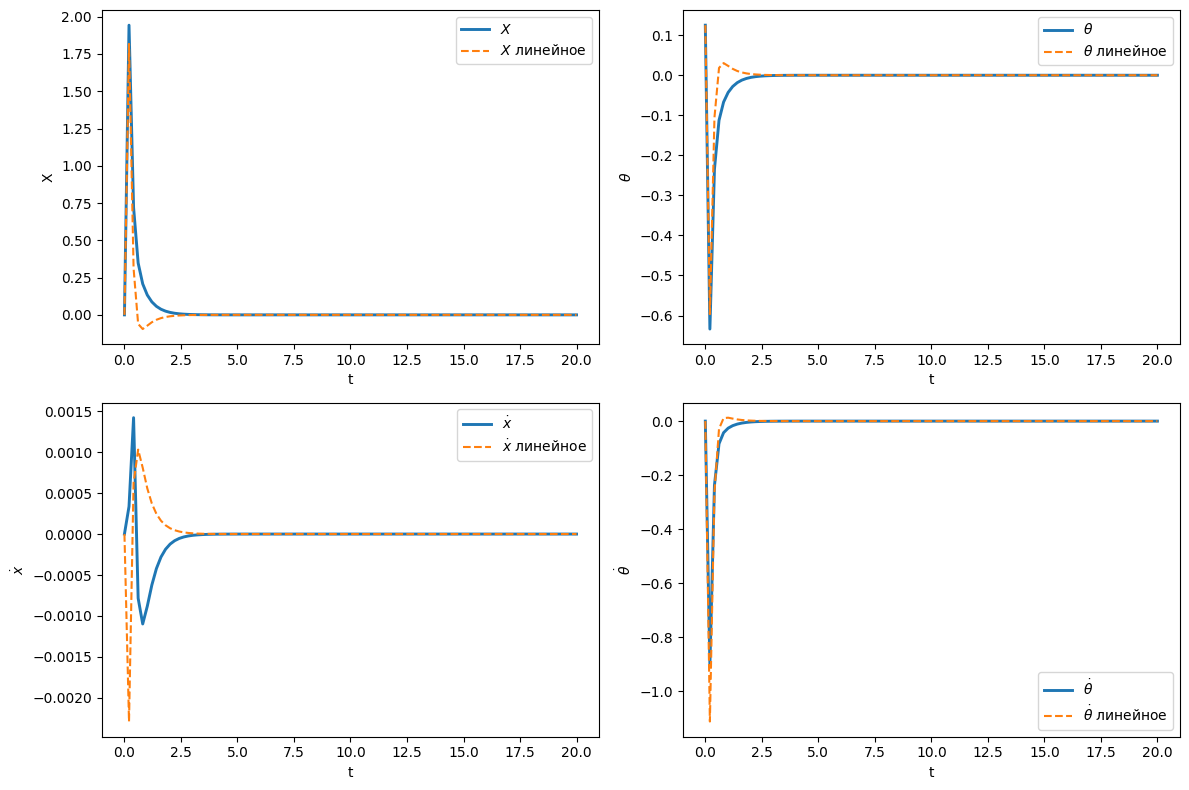

In [78]:
plt.figure(figsize=(12, 8))

# График x1 (позиция)
plt.subplot(2, 2, 1)
plt.plot(sol.t, sol.y[0], label='$X$', linewidth = 2.1)
plt.plot(solLineal.t, solLineal.y[0], label='$X$ линейное', linestyle = '--')
#plt.plot(t, x1, label='$x$', color='blue')
plt.xlabel('t')
plt.ylabel('X')
plt.grid(False)
plt.legend()

# График x2 (угол)
plt.subplot(2, 2, 2)
plt.plot(sol.t, sol.y[1]/np.pi, label=r'$\theta$', linewidth = 2.1)
plt.plot(solLineal.t, solLineal.y[1]/np.pi, label=r'$\theta$ линейное', linestyle = '--')
#plt.plot(t, x2, label=r'$\theta$', color='green')
plt.xlabel('t')
plt.ylabel(r'$\theta$')
plt.grid(False)
plt.legend()

# График x3 (скорость позиции)
plt.subplot(2, 2, 3)
plt.plot(sol.t, sol.y[2], label=r'$\dot{x}$', linewidth = 2.1)
plt.plot(solLineal.t, solLineal.y[2], label=r'$\dot{x}$ линейное', linestyle = '--')
#plt.plot(t, x3, label=r'$\dot{x}$', color='red')
plt.xlabel('t')
plt.ylabel(r'$\dot{x}$')
plt.grid(False)
plt.legend()

# График x4 (угловая скорость)
plt.subplot(2, 2, 4)
plt.plot(sol.t, sol.y[3], label=r'$\dot{\theta}$', linewidth = 2.1)
plt.plot(solLineal.t, solLineal.y[3], label=r'$\dot{\theta}$ линейное', linestyle = '--')
#plt.plot(t, x4, label=r'$\dot{\theta}$', color='purple')
plt.xlabel('t')
plt.ylabel(r'$\dot{\theta}$')
plt.grid(False)
plt.legend()

plt.tight_layout()
plt.show()

### 6 б

#### Двигаем 2 с.ч. в -2 +- 3i

In [79]:
lambda1 = -2 + 3j  
lambda2 = -2 - 3j

eq1 = char_poly.subs('lambda', lambda1)
eq2 = char_poly.subs('lambda', lambda2)

# Решаем систему уравнений для Θ₁ и Θ₂
solutions = sp.solve([sp.re(eq1), sp.re(eq2), sp.im(eq1), sp.im(eq2)], [Theta1, Theta2], dict=True)

print("\nНайденные решения:")
for sol in solutions:
    print(f"Θ1 = {sol[Theta1].evalf()}, Θ2 = {sol[Theta2].evalf()}")


Найденные решения:
Θ1 = 33.1100634566580, Θ2 = -24.9504594745197


In [80]:
L_hat = np.array([
    [33.1100634566580, -24.9504594745197, 0, 0],
    [33.1100634566580, -24.9504594745197, 0, 0]
])

L = (L_hat @ P_).T
print("L:\n", L)

L:
 [[-24.84215348 -24.84215348]
 [ 29.36318597  29.36318597]
 [  0.05643081   0.05643081]
 [ 15.29917298  15.29917298]]


In [81]:
Ac = A - L @ C
print(Ac)

[[ 2.48421535e+01  2.48421535e+01  1.00000000e+00  0.00000000e+00]
 [-2.93631860e+01 -2.93631860e+01  0.00000000e+00  1.00000000e+00]
 [-5.64308056e-02  4.55419445e-03 -7.48940000e+00 -8.75000000e-02]
 [-1.52991730e+01 -1.42175030e+01 -8.21530000e-01 -1.55195000e+00]]


In [83]:
g = 9.81
Kt = 1.726
Ks = 4.487
Bcq = 5.4
m =  0.56
l =  0.1778
Bp = 1.4
I = 0.89
M = 1.206

A1 = m + M
C1 = m * l
D1 = I + m * l**2
K1 = Kt*Ks + Bcq

def systemLinal(x, Y):
    x, fi, y1, y2 = Y
    tu = 0
    return [Ac[0][0] * x + Ac[0][1] * fi + y1, Ac[1][0] * x + Ac[1][1] * fi + y2, Ac[2][0] * x + Ac[2][1]*fi + Ac[2][2] * y1 + Ac[2][3] * y2, Ac[3][0] * x + Ac[3][1] *  fi + Ac[3][2] * y1 + Ac[3][3] * y2]

def system(x, Y):
    y1, y2, y3, y4 = Y

    #u = u1 * y1 + u2 * y2 + u3 * y3 + u4 * y4
    f1 = -K1*y3 - C1 * y4**2 * np.sin(y2)
    f2 = -Bp*y4 + C1 * g * np.sin(y2)

    dydt = [
        -L[0][0] * y1 + -L[0][1] * y2 + y3,
        -L[1][0] * y1 + -L[1][1] * y2 + y4,
        (f1*D1 + f2 * C1 * np.cos(y2))/(A1*D1-(C1*np.cos(y2))**2) + -L[2][0] * y1 + -L[2][1] * y2,
        (f1 * C1 * np.cos(y2) + f2 * A1)/(A1*D1 - (C1*np.cos(y2))**2) + -L[3][0] * y1 + -L[3][1] * y2,
    ]

    return dydt

# Начальные условия
x0 = 0.0
xT = 20.0
y0 = [0.0, np.pi/8, 0.0, 0.0] 
x_span = (x0, xT)  # интервал по x

# Решаем систему
sol = solve_ivp(system, x_span, y0, t_eval=np.linspace(x0, xT, 100))
solLineal = solve_ivp(systemLinal, x_span, y0, t_eval=np.linspace(x0, xT, 100))

U = 7.0 * sol.y[0] + 92 * sol.y[1] + 52 * sol.y[2] - 8.0 * sol.y[3]
U_lin = 7.0 * solLineal.y[0] + 92 * solLineal.y[1] + 52 * solLineal.y[2] - 8.0 * solLineal.y[3]

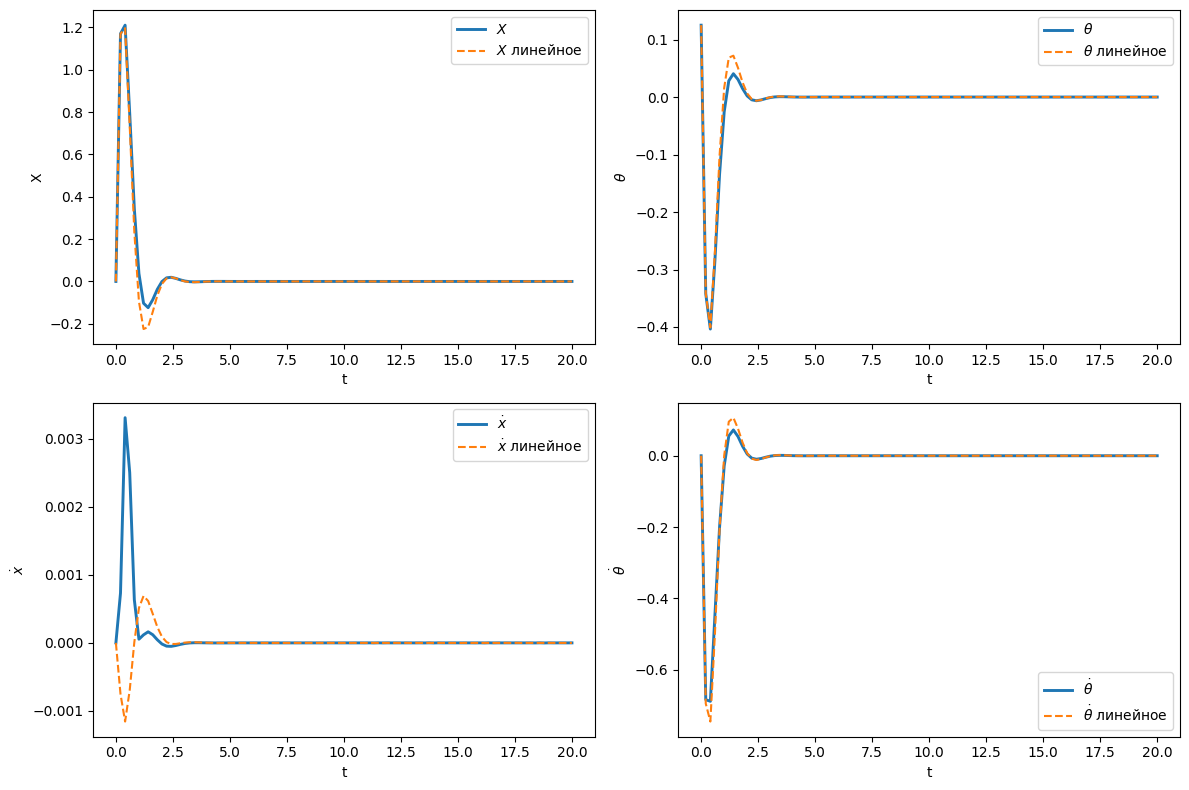

In [84]:
plt.figure(figsize=(12, 8))

# График x1 (позиция)
plt.subplot(2, 2, 1)
plt.plot(sol.t, sol.y[0], label='$X$', linewidth = 2.1)
plt.plot(solLineal.t, solLineal.y[0], label='$X$ линейное', linestyle = '--')
#plt.plot(t, x1, label='$x$', color='blue')
plt.xlabel('t')
plt.ylabel('X')
plt.grid(False)
plt.legend()

# График x2 (угол)
plt.subplot(2, 2, 2)
plt.plot(sol.t, sol.y[1]/np.pi, label=r'$\theta$', linewidth = 2.1)
plt.plot(solLineal.t, solLineal.y[1]/np.pi, label=r'$\theta$ линейное', linestyle = '--')
#plt.plot(t, x2, label=r'$\theta$', color='green')
plt.xlabel('t')
plt.ylabel(r'$\theta$')
plt.grid(False)
plt.legend()

# График x3 (скорость позиции)
plt.subplot(2, 2, 3)
plt.plot(sol.t, sol.y[2], label=r'$\dot{x}$', linewidth = 2.1)
plt.plot(solLineal.t, solLineal.y[2], label=r'$\dot{x}$ линейное', linestyle = '--')
#plt.plot(t, x3, label=r'$\dot{x}$', color='red')
plt.xlabel('t')
plt.ylabel(r'$\dot{x}$')
plt.grid(False)
plt.legend()

# График x4 (угловая скорость)
plt.subplot(2, 2, 4)
plt.plot(sol.t, sol.y[3], label=r'$\dot{\theta}$', linewidth = 2.1)
plt.plot(solLineal.t, solLineal.y[3], label=r'$\dot{\theta}$ линейное', linestyle = '--')
#plt.plot(t, x4, label=r'$\dot{\theta}$', color='purple')
plt.xlabel('t')
plt.ylabel(r'$\dot{\theta}$')
plt.grid(False)
plt.legend()

plt.tight_layout()
plt.show()

#### Двигаем 2 с.ч. в -1/2 +- 2i

In [85]:
lambda1 = -1/2 + 2j  
lambda2 = -1/2 - 2j

eq1 = char_poly.subs('lambda', lambda1)
eq2 = char_poly.subs('lambda', lambda2)

# Решаем систему уравнений для Θ₁ и Θ₂
solutions = sp.solve([sp.re(eq1), sp.re(eq2), sp.im(eq1), sp.im(eq2)], [Theta1, Theta2], dict=True)

print("\nНайденные решения:")
for sol in solutions:
    print(f"Θ1 = {sol[Theta1].evalf()}, Θ2 = {sol[Theta2].evalf()}")


Найденные решения:
Θ1 = 10.8727556000914, Θ2 = -8.15688098244241


In [86]:
L_hat = np.array([
    [10.8727556000914, -8.15688098244241, 0, 0],
    [10.8727556000914, -8.15688098244241, 0, 0]
])

L = (L_hat @ P_).T
print("L:\n", L)

L:
 [[-8.12131522 -8.12131522]
 [ 9.64234771  9.64234771]
 [ 0.01853087  0.01853087]
 [ 5.02397614  5.02397614]]


In [87]:
Ac = A - L @ C
print(Ac)

[[ 8.12131522  8.12131522  1.          0.        ]
 [-9.64234771 -9.64234771  0.          1.        ]
 [-0.01853087  0.04245413 -7.4894     -0.0875    ]
 [-5.02397614 -3.94230614 -0.82153    -1.55195   ]]


In [88]:
g = 9.81
Kt = 1.726
Ks = 4.487
Bcq = 5.4
m =  0.56
l =  0.1778
Bp = 1.4
I = 0.89
M = 1.206

A1 = m + M
C1 = m * l
D1 = I + m * l**2
K1 = Kt*Ks + Bcq

def systemLinal(x, Y):
    x, fi, y1, y2 = Y
    tu = 0
    return [Ac[0][0] * x + Ac[0][1] * fi + y1, Ac[1][0] * x + Ac[1][1] * fi + y2, Ac[2][0] * x + Ac[2][1]*fi + Ac[2][2] * y1 + Ac[2][3] * y2, Ac[3][0] * x + Ac[3][1] *  fi + Ac[3][2] * y1 + Ac[3][3] * y2]

def system(x, Y):
    y1, y2, y3, y4 = Y

    #u = u1 * y1 + u2 * y2 + u3 * y3 + u4 * y4
    f1 = -K1*y3 - C1 * y4**2 * np.sin(y2)
    f2 = -Bp*y4 + C1 * g * np.sin(y2)

    dydt = [
        -L[0][0] * y1 + -L[0][1] * y2 + y3,
        -L[1][0] * y1 + -L[1][1] * y2 + y4,
        (f1*D1 + f2 * C1 * np.cos(y2))/(A1*D1-(C1*np.cos(y2))**2) + -L[2][0] * y1 + -L[2][1] * y2,
        (f1 * C1 * np.cos(y2) + f2 * A1)/(A1*D1 - (C1*np.cos(y2))**2) + -L[3][0] * y1 + -L[3][1] * y2,
    ]

    return dydt

# Начальные условия
x0 = 0.0
xT = 20.0
y0 = [0.0, np.pi/8, 0.0, 0.0] 
x_span = (x0, xT)  # интервал по x

# Решаем систему
sol = solve_ivp(system, x_span, y0, t_eval=np.linspace(x0, xT, 100))
solLineal = solve_ivp(systemLinal, x_span, y0, t_eval=np.linspace(x0, xT, 100))

U = 7.0 * sol.y[0] + 92 * sol.y[1] + 52 * sol.y[2] - 8.0 * sol.y[3]
U_lin = 7.0 * solLineal.y[0] + 92 * solLineal.y[1] + 52 * solLineal.y[2] - 8.0 * solLineal.y[3]

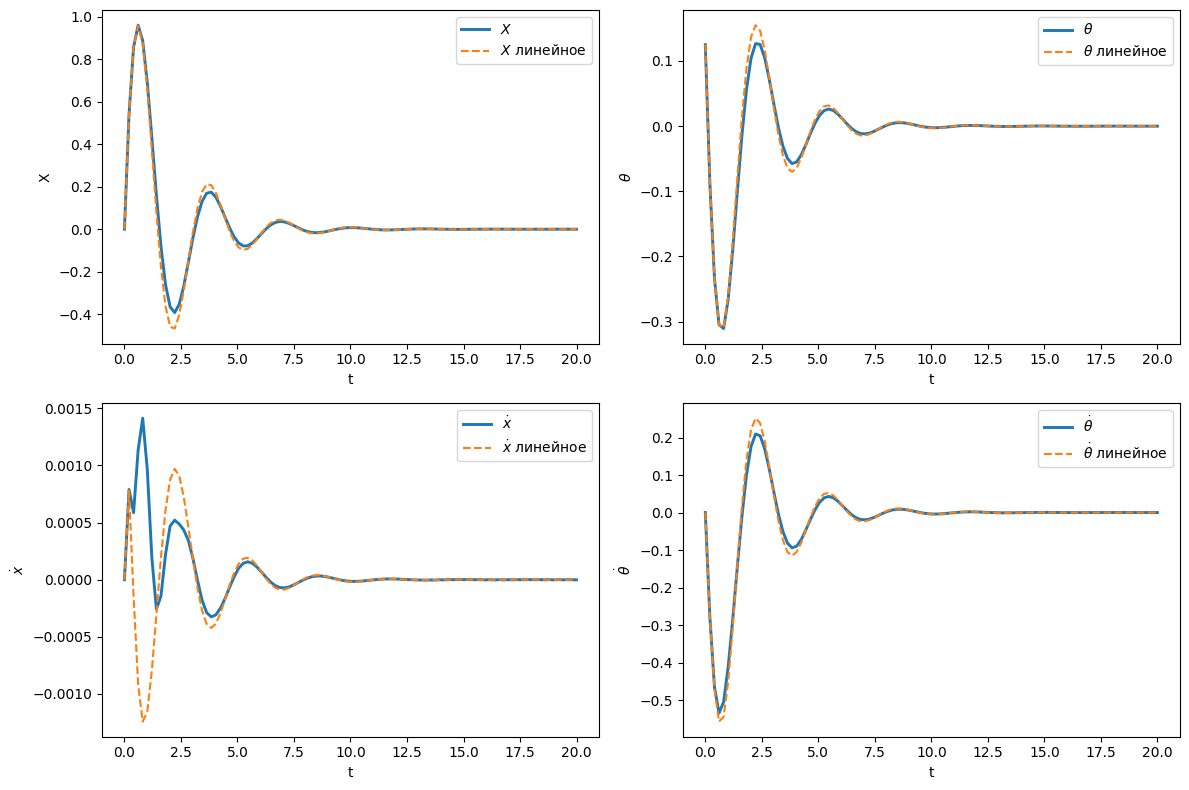

In [89]:
plt.figure(figsize=(12, 8))

# График x1 (позиция)
plt.subplot(2, 2, 1)
plt.plot(sol.t, sol.y[0], label='$X$', linewidth = 2.1)
plt.plot(solLineal.t, solLineal.y[0], label='$X$ линейное', linestyle = '--')
#plt.plot(t, x1, label='$x$', color='blue')
plt.xlabel('t')
plt.ylabel('X')
plt.grid(False)
plt.legend()

# График x2 (угол)
plt.subplot(2, 2, 2)
plt.plot(sol.t, sol.y[1]/np.pi, label=r'$\theta$', linewidth = 2.1)
plt.plot(solLineal.t, solLineal.y[1]/np.pi, label=r'$\theta$ линейное', linestyle = '--')
#plt.plot(t, x2, label=r'$\theta$', color='green')
plt.xlabel('t')
plt.ylabel(r'$\theta$')
plt.grid(False)
plt.legend()

# График x3 (скорость позиции)
plt.subplot(2, 2, 3)
plt.plot(sol.t, sol.y[2], label=r'$\dot{x}$', linewidth = 2.1)
plt.plot(solLineal.t, solLineal.y[2], label=r'$\dot{x}$ линейное', linestyle = '--')
#plt.plot(t, x3, label=r'$\dot{x}$', color='red')
plt.xlabel('t')
plt.ylabel(r'$\dot{x}$')
plt.grid(False)
plt.legend()

# График x4 (угловая скорость)
plt.subplot(2, 2, 4)
plt.plot(sol.t, sol.y[3], label=r'$\dot{\theta}$', linewidth = 2.1)
plt.plot(solLineal.t, solLineal.y[3], label=r'$\dot{\theta}$ линейное', linestyle = '--')
#plt.plot(t, x4, label=r'$\dot{\theta}$', color='purple')
plt.xlabel('t')
plt.ylabel(r'$\dot{\theta}$')
plt.grid(False)
plt.legend()

plt.tight_layout()
plt.show()

#### Двигаем 2 с.ч. в -1/2 +- 8i

In [90]:
lambda1 = -1/2 + 8j  
lambda2 = -1/2 - 8j

eq1 = char_poly.subs('lambda', lambda1)
eq2 = char_poly.subs('lambda', lambda2)

# Решаем систему уравнений для Θ₁ и Θ₂
solutions = sp.solve([sp.re(eq1), sp.re(eq2), sp.im(eq1), sp.im(eq2)], [Theta1, Theta2], dict=True)

print("\nНайденные решения:")
for sol in solutions:
    print(f"Θ1 = {sol[Theta1].evalf()}, Θ2 = {sol[Theta2].evalf()}")


Найденные решения:
Θ1 = 140.245960259090, Θ2 = -123.312847599744


In [91]:
L_hat = np.array([
    [140.245960259090, -123.312847599744, 0, 0],
    [140.245960259090, -123.312847599744, 0, 0]
])

L = (L_hat @ P_).T
print("L:\n", L)

L:
 [[-122.85409044 -122.85409044]
 [ 124.37512294  124.37512294]
 [   0.2390268     0.2390268 ]
 [  64.8034761    64.8034761 ]]


In [92]:
Ac = A - L @ C
print(Ac)

[[ 1.22854090e+02  1.22854090e+02  1.00000000e+00  0.00000000e+00]
 [-1.24375123e+02 -1.24375123e+02  0.00000000e+00  1.00000000e+00]
 [-2.39026800e-01 -1.78041800e-01 -7.48940000e+00 -8.75000000e-02]
 [-6.48034761e+01 -6.37218061e+01 -8.21530000e-01 -1.55195000e+00]]


In [93]:
g = 9.81
Kt = 1.726
Ks = 4.487
Bcq = 5.4
m =  0.56
l =  0.1778
Bp = 1.4
I = 0.89
M = 1.206

A1 = m + M
C1 = m * l
D1 = I + m * l**2
K1 = Kt*Ks + Bcq

def systemLinal(x, Y):
    x, fi, y1, y2 = Y
    tu = 0
    return [Ac[0][0] * x + Ac[0][1] * fi + y1, Ac[1][0] * x + Ac[1][1] * fi + y2, Ac[2][0] * x + Ac[2][1]*fi + Ac[2][2] * y1 + Ac[2][3] * y2, Ac[3][0] * x + Ac[3][1] *  fi + Ac[3][2] * y1 + Ac[3][3] * y2]

def system(x, Y):
    y1, y2, y3, y4 = Y

    #u = u1 * y1 + u2 * y2 + u3 * y3 + u4 * y4
    f1 = -K1*y3 - C1 * y4**2 * np.sin(y2)
    f2 = -Bp*y4 + C1 * g * np.sin(y2)

    dydt = [
        -L[0][0] * y1 + -L[0][1] * y2 + y3,
        -L[1][0] * y1 + -L[1][1] * y2 + y4,
        (f1*D1 + f2 * C1 * np.cos(y2))/(A1*D1-(C1*np.cos(y2))**2) + -L[2][0] * y1 + -L[2][1] * y2,
        (f1 * C1 * np.cos(y2) + f2 * A1)/(A1*D1 - (C1*np.cos(y2))**2) + -L[3][0] * y1 + -L[3][1] * y2,
    ]

    return dydt

# Начальные условия
x0 = 0.0
xT = 20.0
y0 = [0.0, np.pi/8, 0.0, 0.0] 
x_span = (x0, xT)  # интервал по x

# Решаем систему
sol = solve_ivp(system, x_span, y0, t_eval=np.linspace(x0, xT, 100))
solLineal = solve_ivp(systemLinal, x_span, y0, t_eval=np.linspace(x0, xT, 100))

U = 7.0 * sol.y[0] + 92 * sol.y[1] + 52 * sol.y[2] - 8.0 * sol.y[3]
U_lin = 7.0 * solLineal.y[0] + 92 * solLineal.y[1] + 52 * solLineal.y[2] - 8.0 * solLineal.y[3]

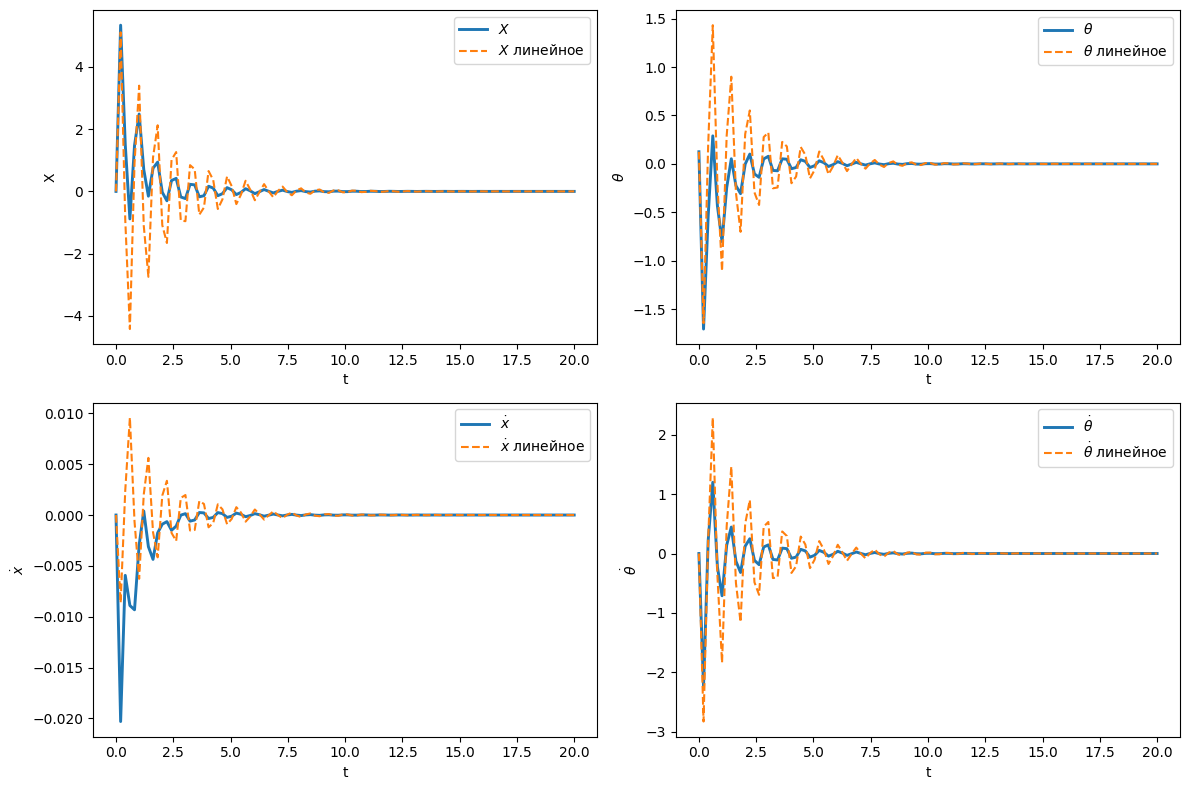

In [94]:
plt.figure(figsize=(12, 8))

# График x1 (позиция)
plt.subplot(2, 2, 1)
plt.plot(sol.t, sol.y[0], label='$X$', linewidth = 2.1)
plt.plot(solLineal.t, solLineal.y[0], label='$X$ линейное', linestyle = '--')
#plt.plot(t, x1, label='$x$', color='blue')
plt.xlabel('t')
plt.ylabel('X')
plt.grid(False)
plt.legend()

# График x2 (угол)
plt.subplot(2, 2, 2)
plt.plot(sol.t, sol.y[1]/np.pi, label=r'$\theta$', linewidth = 2.1)
plt.plot(solLineal.t, solLineal.y[1]/np.pi, label=r'$\theta$ линейное', linestyle = '--')
#plt.plot(t, x2, label=r'$\theta$', color='green')
plt.xlabel('t')
plt.ylabel(r'$\theta$')
plt.grid(False)
plt.legend()

# График x3 (скорость позиции)
plt.subplot(2, 2, 3)
plt.plot(sol.t, sol.y[2], label=r'$\dot{x}$', linewidth = 2.1)
plt.plot(solLineal.t, solLineal.y[2], label=r'$\dot{x}$ линейное', linestyle = '--')
#plt.plot(t, x3, label=r'$\dot{x}$', color='red')
plt.xlabel('t')
plt.ylabel(r'$\dot{x}$')
plt.grid(False)
plt.legend()

# График x4 (угловая скорость)
plt.subplot(2, 2, 4)
plt.plot(sol.t, sol.y[3], label=r'$\dot{\theta}$', linewidth = 2.1)
plt.plot(solLineal.t, solLineal.y[3], label=r'$\dot{\theta}$ линейное', linestyle = '--')
#plt.plot(t, x4, label=r'$\dot{\theta}$', color='purple')
plt.xlabel('t')
plt.ylabel(r'$\dot{\theta}$')
plt.grid(False)
plt.legend()

plt.tight_layout()
plt.show()